# Problem statement:
A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you may expect — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighborhood and based on gathered data you will try to assess your house price.

## Objective:
Take advantage of all of the feature variables available below, use it to analyse and predict house prices. 
1. cid: a notation for a house 

2. dayhours: Date house was sold 

3. price: Price is prediction target 

4. room_bed: Number of Bedrooms/House 

5. room_bath: Number of bathrooms/bedrooms 

6. living_measure: square footage of the home 

7. lot_measure: quare footage of the lot 

8. ceil: Total floors (levels) in house 

9. coast: House which has a view to a waterfront 

10. sight: Has been viewed 

11. condition: How good the condition is (Overall) 

12. quality: grade given to the housing unit, based on grading system 

13. ceil_measure: square footage of house apart from basement 

14. basement_measure: square footage of the basement 

15. yr_built: Built Year 

16. yr_renovated: Year when house was renovated 

17. zipcode: zip 

18. lat: Latitude coordinate 

19. long: Longitude coordinate 

20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area 

21. lot_measure15: lotSize area in 2015(implies-- some renovations) 

22. furnished: Based on the quality of room 

23. total_area: Measure of both living and lot

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.20.3
Pandas Version 1.3.4
Seaborn Version 0.11.2
Matplotlib Version 3.4.3


In [3]:
df = pd.read_excel('C:/Users/Acer/Downloads/Final Capstone Project/innercity.xlsx')
pd.options.display.max_columns = None
df.head()

cid         dayhours     price  room_bed  room_bath  \
0  3.876101e+09  20150427T000000  600000.0       4.0       1.75   
1  3.145600e+09  20150317T000000  190000.0       2.0       1.00   
2  7.129303e+09  20140820T000000  735000.0       4.0       2.75   
3  7.338220e+09  20141010T000000  257000.0       3.0       2.50   
4  7.950301e+09  20150218T000000  450000.0       2.0       1.00   

   living_measure  lot_measure ceil coast  sight condition  quality  \
0          3050.0       9440.0  1.0   0.0    0.0       3.0      8.0   
1           670.0       3101.0  1.0   0.0    0.0       4.0      6.0   
2          3040.0       2415.0  2.0   1.0    4.0       3.0      8.0   
3          1740.0       3721.0  2.0   0.0    0.0       3.0      8.0   
4          1120.0       4590.0  1.0   0.0    0.0       3.0      7.0   

   ceil_measure  basement yr_built  yr_renovated  zipcode      lat     long  \
0        1800.0    1250.0   1966.0           0.0  98034.0  47.7228 -122.183   
1         670.0       0.0   1948.0           0.0  98118.0  47.5546 -122.274   
2        3040.0       0.0   1966.0           0.0  98118.0  47.5188 -122.256   
3        1740.0       0.0   2009.0           0.0  98002.0  47.3363 -122.213   
4        1120.0       0.0   1924.0           0.0  98118.0  47.5663 -122.285   

   living_measure15  lot_measure15  furnished total_area  
0            2020.0         8660.0        0.0    12490.0  
1            1660.0         4100.0        0.0     3771.0  
2            2620.0         2433.0        0.0     5455.0  
3            2030.0         3794.0        0.0     5461.0  
4            1120.0         5100.0        0.0     5710.0

In [4]:
df.shape

(21613, 23)

In [5]:
df.drop(['cid'], axis = 'columns',inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayhours          21613 non-null  object 
 1   price             21613 non-null  float64
 2   room_bed          21505 non-null  float64
 3   room_bath         21505 non-null  float64
 4   living_measure    21596 non-null  float64
 5   lot_measure       21571 non-null  float64
 6   ceil              21571 non-null  object 
 7   coast             21612 non-null  object 
 8   sight             21556 non-null  float64
 9   condition         21556 non-null  object 
 10  quality           21612 non-null  float64
 11  ceil_measure      21612 non-null  float64
 12  basement          21612 non-null  float64
 13  yr_built          21612 non-null  object 
 14  yr_renovated      21613 non-null  float64
 15  zipcode           21613 non-null  float64
 16  lat               21613 non-null  float6

In [7]:
df.isnull().sum()

dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [8]:
df.room_bed.unique()

array([ 4.,  2.,  3.,  1.,  5.,  6., nan,  7., 10.,  8.,  0.,  9., 33.,
       11.])

In [9]:
df.room_bath.unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75,  nan, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25,
       6.  , 0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

In [10]:
df.living_measure.unique()

array([3050.,  670., 3040., ..., 1405., 1295., 2253.])

In [11]:
df.lot_measure.unique()

array([ 9440.,  3101.,  2415., ..., 12369.,  2332., 60467.])

In [12]:
df.sight.unique()

array([ 0.,  4.,  2.,  3.,  1., nan])

In [13]:
df.quality.unique()

array([ 8.,  6.,  7., 10.,  9.,  5., 11., 13.,  4., 12.,  1.,  3., nan])

In [14]:
df.basement.unique()

array([1250.,    0., 1320., 1000.,  480.,  610., 1050.,  700.,  430.,
        560.,  250.,  670.,  570.,  290.,  600.,  680.,  380.,   50.,
       1020.,  690., 1010.,  530., 1370., 1040.,  790.,  910.,  820.,
       1850.,  500.,  760.,  960.,  340.,  800.,  580., 1600., 1680.,
        900.,  420.,  450.,  200.,  240.,  950., 1590., 1220., 1500.,
        710.,   80.,  140., 1260.,  860.,  890.,  280.,  440.,  880.,
        220., 1650.,  630.,  780.,  810.,  300.,  720.,  470.,  150.,
       1180., 1060.,  120.,  660.,  400., 1100., 1780.,  640., 1170.,
       1890.,  130.,  550.,  360.,  940.,  650., 2730.,  870.,  730.,
       1350., 1530., 1540.,  620., 1080., 1900.,  770.,  520.,  920.,
       1110.,  830., 1420.,  980.,  190.,  330.,  350.,  740., 1570.,
        990., 1390.,  260.,  540., 1300.,  265., 1120.,  460.,  370.,
       1830., 1140.,  270.,  145.,  510.,  750., 1710.,  930., 1870.,
       1200.,  310.,  850.,  506.,  970., 1070., 1450.,  840.,   90.,
       3500., 1380.,

In [15]:
df.furnished.unique()

array([ 0.,  1., nan])

In [16]:
df.ceil.unique()

array([1.0, 2.0, 3.0, 1.5, 2.5, '$', nan, 3.5], dtype=object)

In [17]:
df.coast.unique()

array([0.0, 1.0, '$', nan], dtype=object)

In [18]:
df.condition.unique()

array([3.0, 4.0, 5.0, 2.0, nan, 1.0, '$'], dtype=object)

In [19]:
df.yr_built.unique()

array([1966.0, 1948.0, 2009.0, 1924.0, 1994.0, 2005.0, 1978.0, 1983.0,
       2012.0, 1912.0, 1990.0, 1967.0, 1919.0, 1908.0, 1950.0, 2000.0,
       2013.0, 1943.0, 1922.0, 1977.0, 2004.0, 1935.0, 1964.0, 1945.0,
       1987.0, 2008.0, 1940.0, 2003.0, 1988.0, 1985.0, 1998.0, 1995.0,
       1946.0, 1984.0, 1958.0, 1963.0, 1942.0, 2014.0, 1971.0, 1936.0,
       1954.0, 1923.0, 2002.0, 1972.0, 2007.0, 1930.0, 1962.0, 1999.0,
       1953.0, 1965.0, 2010.0, 1997.0, 2006.0, 1979.0, 1996.0, 1992.0,
       1968.0, 1980.0, 1981.0, 1969.0, 2001.0, 1929.0, 1952.0, 1916.0,
       1976.0, 1974.0, 1920.0, 1931.0, 1975.0, 1960.0, 1900.0, '$',
       1986.0, 1989.0, 1906.0, 1955.0, 1956.0, 1915.0, 1941.0, 1993.0,
       2011.0, 1925.0, 1947.0, 1991.0, 1926.0, 1927.0, 1951.0, 1961.0,
       1932.0, 1917.0, 1928.0, 1959.0, 1921.0, 1911.0, 1949.0, 1982.0,
       1913.0, 1957.0, 1914.0, 1938.0, 1973.0, 1937.0, 1944.0, 1970.0,
       1901.0, 1907.0, 1939.0, 1918.0, 1934.0, 1904.0, 2015.0, 1909.0,
       19

In [20]:
df.total_area.unique()

array([12490.0, 3771.0, 5455.0, ..., 16111.0, 63597.0, 38122.0],
      dtype=object)

In [21]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- dayhours ---
20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150515T000000      1
20150110T000000      1
20140803T000000      1
20150131T000000      1
20140830T000000      1
Name: dayhours, Length: 372, dtype: int64
---- price ---
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
919000.0      1
364988.0      1
362764.0      1
849900.0      1
685530.0      1
Name: price, Length: 3625, dtype: int64
---- room_bed ---
3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64
---- room_bath ---
2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21


As we can see here there are $ & NaN values present in our data we need to impute them.

In [22]:
df[["ceil","coast","condition","yr_built","total_area","long"]] = df[["ceil","coast","condition","yr_built","total_area","long"]].astype(str)

In [23]:
df["ceil"] = df["ceil"].apply(lambda x: x.replace("$","nan"))

In [24]:
df["coast"] = df["coast"].apply(lambda x: x.replace("$","nan"))

In [25]:
df["condition"] = df["condition"].apply(lambda x: x.replace("$","nan"))

In [26]:
df["yr_built"] = df["yr_built"].apply(lambda x: x.replace("$","nan"))

In [27]:
df["total_area"] = df["total_area"].apply(lambda x: x.replace("$","nan"))

In [28]:
df["long"] = df["long"].apply(lambda x: x.replace("$","nan"))

Now, all the $ sign have been removed with NaN Values, but we know there are still NaN values present in our data which we are going to impute through KNNImputer.

In [29]:
df["dayhours"] = df["dayhours"].str.replace('T000000', "")

In [30]:
df.isnull().sum()

dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                  0
coast                 0
sight                57
condition             0
quality               1
ceil_measure          1
basement              1
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area            0
dtype: int64

In [31]:
from sklearn.impute import KNNImputer

In [32]:
Imputer = KNNImputer(n_neighbors = 2)
df2 = Imputer.fit_transform(df[["dayhours","price","room_bed","room_bath","living_measure","lot_measure","ceil","coast","sight","condition",
                                "quality","ceil_measure","basement","yr_built","yr_renovated","living_measure15","lot_measure15","furnished",
                                "total_area",'lat','long','zipcode']])

In [33]:
hp = pd.DataFrame(df2, columns = ["dayhours","price","room_bed","room_bath","living_measure","lot_measure","ceil","coast","sight","condition",
                                  "quality","ceil_measure","basement","yr_built","yr_renovated","living_measure15","lot_measure15","furnished",
                                  "total_area",'lat','long','zipcode'])

In [34]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayhours          21613 non-null  float64
 1   price             21613 non-null  float64
 2   room_bed          21613 non-null  float64
 3   room_bath         21613 non-null  float64
 4   living_measure    21613 non-null  float64
 5   lot_measure       21613 non-null  float64
 6   ceil              21613 non-null  float64
 7   coast             21613 non-null  float64
 8   sight             21613 non-null  float64
 9   condition         21613 non-null  float64
 10  quality           21613 non-null  float64
 11  ceil_measure      21613 non-null  float64
 12  basement          21613 non-null  float64
 13  yr_built          21613 non-null  float64
 14  yr_renovated      21613 non-null  float64
 15  living_measure15  21613 non-null  float64
 16  lot_measure15     21613 non-null  float6

Here, we can see all of the values have been imputed with help of KNNImputer. I've used specifically this imputer because there was chance that our model could get biased if we had used MEAN,MEDIAN,MODE formula but in case of this imputer it searches for the nearest value and then impute those values with it.

In [35]:
hp.describe().T

count          mean            std           min  \
dayhours          21613.0  2.014390e+07    4436.582469  2.014050e+07   
price             21613.0  5.401822e+05  367362.231718  7.500000e+04   
room_bed          21613.0  3.371582e+00       0.929343  0.000000e+00   
room_bath         21613.0  2.115168e+00       0.769351  0.000000e+00   
living_measure    21613.0  2.079903e+03     918.300749  2.900000e+02   
lot_measure       21613.0  1.509801e+04   41389.711890  5.200000e+02   
ceil              21613.0  1.494182e+00       0.539604  1.000000e+00   
coast             21613.0  7.449220e-03       0.085989  0.000000e+00   
sight             21613.0  2.344885e-01       0.765929  0.000000e+00   
condition         21613.0  3.409244e+00       0.650148  1.000000e+00   
quality           21613.0  7.656873e+00       1.175459  1.000000e+00   
ceil_measure      21613.0  1.788347e+03     828.088623  2.900000e+02   
basement          21613.0  2.915343e+02     442.573959  0.000000e+00   
yr_built          21613.0  1.971007e+03      29.366925  1.900000e+03   
yr_renovated      21613.0  8.440226e+01     401.679240  0.000000e+00   
living_measure15  21613.0  1.986686e+03     684.476238  3.990000e+02   
lot_measure15     21613.0  1.277500e+04   27310.371557  6.510000e+02   
furnished         21613.0  1.966178e-01       0.397406  0.000000e+00   
total_area        21613.0  1.718856e+04   41595.794198  1.423000e+03   
lat               21613.0  4.756005e+01       0.138564  4.715590e+01   
long              21613.0 -1.222139e+02       0.140851 -1.225190e+02   
zipcode           21613.0  9.807794e+04      53.505026  9.800100e+04   

                           25%           50%           75%           max  
dayhours          2.014072e+07  2.014102e+07  2.015022e+07  2.015053e+07  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.620000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.032000e+03  9.575000e+03  1.300000e+04  1.652659e+06  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04

CID: House ID/Property ID.Not used for analysis

Dayhours: 5 factor analysis is reflecting for this column

price: Our taget column value is in 75k - 7700k range. As Mean > Median, it's rightly skewed.

room_bed: Number of bedrooms range from 0 - 33. As Mean slightly > Median, it's slightly rightly skewed.

room_bath: Number of bathrooms range from 0 - 8. As Mean slightly < Median, it's slightly leftly skewed.

living_measure: Square footage of house range from 290 - 13,540. As Mean > Median, it's rightly skewed.

lot_measure: Square footage of lot range from 520 - 16,51,359. As Mean almost double of Median, it's Hightly rightly skewed.

ceil: Number of floors range from 1 - 3.5 As Mean ~ Median, it's almost Normal Distributed.

coast: As this value represent whether house has waterfront view or not. It's categorical column. From above analysis we got 
know, very few houses has waterfront view.

sight: Value ranges from 0 - 4. As Mean > Median, it's rightly skewed

condition: Represents rating of house which ranges from 1 - 5. As Mean > Median, it's rightly skewed

quality: Representign grade given to house which range from 1 - 13. As Mean > Median, it's rightly skewed.

ceil_measure: Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's rightly skewed.

basement: Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's Highly rightly skewed.

yr_built: House built year ranges from 1900 - 2015. As Mean < Median, it's leftly skewed.

yr_renovated: House renovation year only 2015. So this column can be used as Categorical Variable for knowing whether house is renovated or not.

zipcode: House ZipCode ranges from 98001 - 98199. As Mean > Median, it's rightly skewed.

lat: Lattitude ranges from 47.1559 - 47.7776 As Mean < Median, it's leftly skewed.

long: Longittude ranges from -122.5190 to -121.315 As Mean > Median, it's rightly skewed.

living_measure15: Value ragnes from 399 to 6,210. As Mean > Median, it's rightly skewed.

lot_measure15: Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's Highly rightly skewed.

furnished: Representing whether house is furnished or not. It's a Categorical Variable

total_area: Total area of house ranges from 1,423 to 16,52,659. As Mean is almost double of Median, it's Highly rightly skewed

# Checking for Outliers

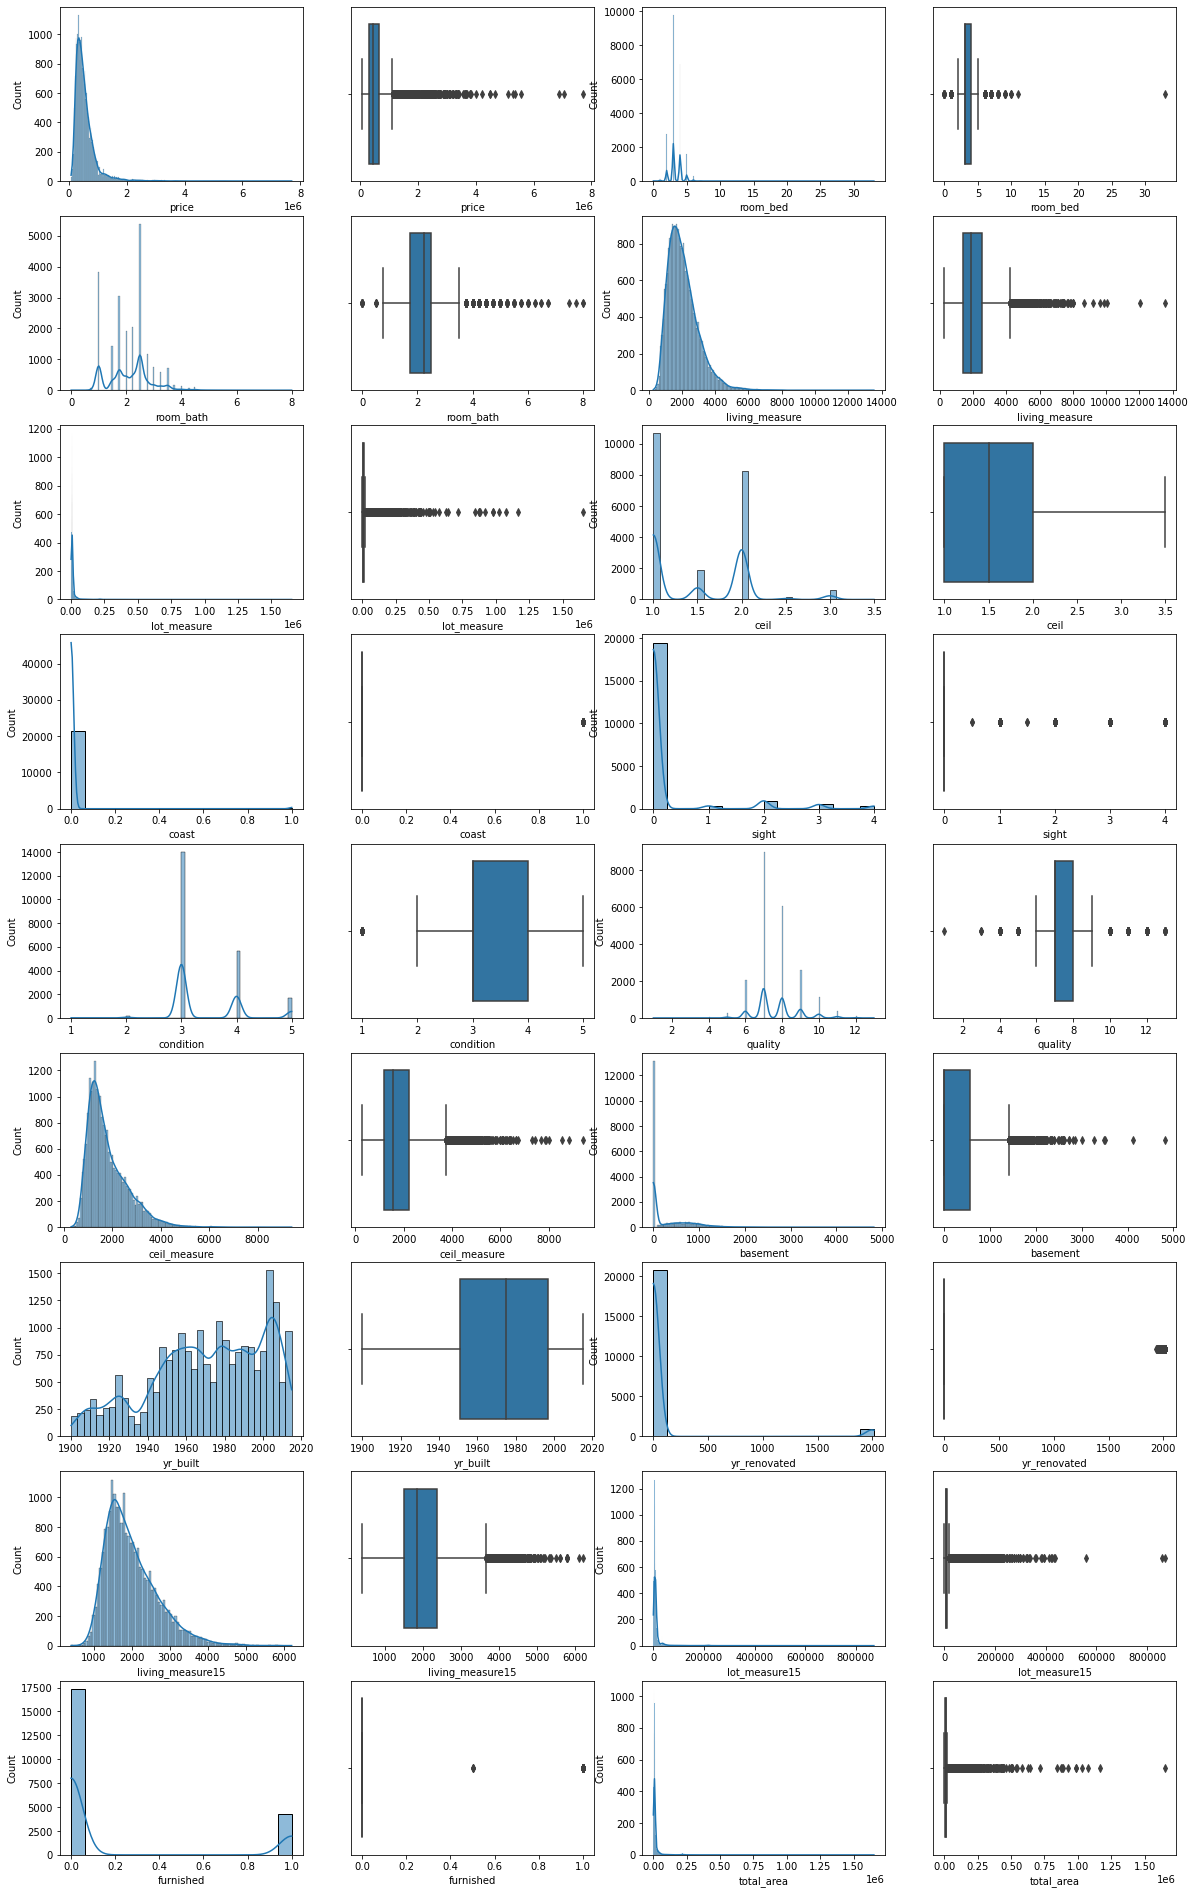

In [36]:
fig,axes = plt.subplots(nrows = 9, ncols = 4)
fig.set_size_inches(20,34)
sns.histplot(hp['price'], kde = True, ax = axes[0][0]);
sns.boxplot(x= 'price', data = hp, ax = axes[0][1]);
sns.histplot(hp['room_bed'], kde = True, ax = axes[0][2]);
sns.boxplot(x= 'room_bed', data = hp, ax = axes[0][3]);
sns.histplot(hp['room_bath'], kde = True, ax = axes[1][0]);
sns.boxplot(x= 'room_bath', data = hp, ax = axes[1][1]);
sns.histplot(hp['living_measure'], kde = True, ax = axes[1][2]);
sns.boxplot(x= 'living_measure', data = hp, ax = axes[1][3]);
sns.histplot(hp['lot_measure'], kde = True, ax = axes[2][0]);
sns.boxplot(x= 'lot_measure', data = hp, ax = axes[2][1]);
sns.histplot(hp['ceil'], kde = True, ax = axes[2][2]);
sns.boxplot(x= 'ceil', data = hp, ax = axes[2][3]);
sns.histplot(hp['coast'], kde = True, ax = axes[3][0]);
sns.boxplot(x= 'coast', data = hp, ax = axes[3][1]);
sns.histplot(hp['sight'], kde = True, ax = axes[3][2]);
sns.boxplot(x= 'sight', data = hp, ax = axes[3][3]);
sns.histplot(hp['condition'], kde = True, ax = axes[4][0]);
sns.boxplot(x= 'condition', data = hp, ax = axes[4][1]);
sns.histplot(hp['quality'], kde = True, ax = axes[4][2]);
sns.boxplot(x= 'quality', data = hp, ax = axes[4][3]);
sns.histplot(hp['ceil_measure'], kde = True, ax = axes[5][0]);
sns.boxplot(x= 'ceil_measure', data = hp, ax = axes[5][1]);
sns.histplot(hp['basement'], kde = True, ax = axes[5][2]);
sns.boxplot(x= 'basement', data = hp, ax = axes[5][3]);
sns.histplot(hp['yr_built'], kde = True, ax = axes[6][0]);
sns.boxplot(x= 'yr_built', data = hp, ax = axes[6][1]);
sns.histplot(hp['yr_renovated'], kde = True, ax = axes[6][2]);
sns.boxplot(x= 'yr_renovated', data = hp, ax = axes[6][3]);
sns.histplot(hp['living_measure15'], kde = True, ax = axes[7][0]);
sns.boxplot(x= 'living_measure15', data = hp, ax = axes[7][1]);
sns.histplot(hp['lot_measure15'], kde = True, ax = axes[7][2]);
sns.boxplot(x= 'lot_measure15', data = hp, ax = axes[7][3]);
sns.histplot(hp['furnished'], kde = True, ax = axes[8][0]);
sns.boxplot(x= 'furnished', data = hp, ax = axes[8][1]);
sns.histplot(hp['total_area'], kde = True, ax = axes[8][2]);
sns.boxplot(x= 'total_area', data = hp, ax = axes[8][3]);

Through the help of Boxplot & Histogram we can see which variables have outliers in them and then remove those outliers with the help of IQR method. So, here we can see that 6 variables have outliers in them

1.room_bed.

2.living_measure.

3.lot_measure.

4.ceil_measure.

5.basement.

# Removing Outliers throught IQR method

In [37]:
def outlier_removal(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

# ceil_measure

In [38]:
lowerbound,upperbound = outlier_removal(hp.ceil_measure)
print(lowerbound,upperbound)

-340.0 3740.0


In [39]:
hp[(hp.ceil_measure < lowerbound) | (hp.ceil_measure > upperbound)]

dayhours      price  room_bed  room_bath  living_measure  \
127    20141216.0  1050000.0       4.0       3.25          4160.0   
155    20150304.0  2140000.0       6.0       4.00          5110.0   
161    20141210.0   775000.0       3.0       2.50          3820.0   
178    20140708.0  1140000.0       5.0       4.00          7320.0   
184    20140618.0  1600000.0       6.0       5.00          6050.0   
...           ...        ...       ...        ...             ...   
21498  20140903.0   665000.0       4.0       3.50          3770.0   
21518  20140701.0   920000.0       4.0       3.50          4080.0   
21564  20140619.0   805000.0       3.0       3.00          3910.0   
21570  20150127.0  1840000.0       4.0       3.50          4870.0   
21577  20140825.0  3100000.0       3.0       3.00          3920.0   

       lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
127        47480.0   2.0    0.0    0.0        3.0     10.0        4160.0   
155         7128.0   2.5    0.0    0.0        4.0     11.0        5110.0   
161        35016.0   2.0    0.0    0.0        4.0      9.0        3820.0   
178       217800.0   2.0    0.0    0.0        3.0     11.0        7320.0   
184       230652.0   2.0    0.0    3.0        3.0     11.0        6050.0   
...            ...   ...    ...    ...        ...      ...           ...   
21498      47480.0   2.0    0.0    0.0        3.0      9.0        3770.0   
21518      10666.0   2.0    0.0    0.0        3.0      9.0        4080.0   
21564      19023.0   2.0    0.0    0.0        3.0     11.0        3910.0   
21570      39190.0   2.0    0.0    0.0        3.0     12.0        4870.0   
21577      13085.0   2.0    1.0    4.0        4.0     11.0        3920.0   

       basement  yr_built  yr_renovated  living_measure15  lot_measure15  \
127         0.0    1995.0           0.0            3400.0        40428.0   
155         0.0    1906.0           0.0            4110.0         6480.0   
161         0.0    1987.0           0.0            3010.0        35190.0   
178         0.0    1992.0           0.0            3270.0        34500.0   
184         0.0    2001.0           0.0            4210.0       233971.0   
...         ...       ...           ...               ...            ...   
21498       0.0    2003.0           0.0            3380.0        42689.0   
21518       0.0    2005.0           0.0            3920.0         8154.0   
21564       0.0    1985.0           0.0            1860.0        15001.0   
21570       0.0    1995.0           0.0            5000.0        33880.0   
21577       0.0    1996.0           0.0            3450.0        13287.0   

       furnished  total_area      lat     long  zipcode  
127          1.0     51640.0  47.7266 -122.115  98072.0  
155          1.0     12238.0  47.6285 -122.304  98112.0  
161          1.0     38836.0  47.6496 -122.041  98053.0  
178          1.0    225120.0  47.4473 -122.086  98058.0  
184          1.0    236702.0  47.6033 -121.943  98024.0  
...          ...         ...      ...      ...      ...  
21498        1.0     51250.0  47.3552 -121.990  98010.0  
21518        1.0     14746.0  47.6818 -122.023  98053.0  
21564        1.0     22933.0  47.6953 -121.914  98014.0  
21570        1.0     44060.0  47.5447 -122.124  98006.0  
21577        1.0     17005.0  47.5716 -122.204  98040.0  

[611 rows x 22 columns]

We got 611 records which are outliers

In [40]:
# dropping the record from the dataset
hp.drop(hp[ (hp.ceil_measure > upperbound) | (hp.ceil_measure < lowerbound) ].index, inplace=True)

In [41]:
hp.shape

(21002, 22)

Skewness is : 0.8200741017261307


count    21002.000000
mean      1712.192696
std        696.036215
min        290.000000
25%       1180.000000
50%       1540.000000
75%       2140.000000
max       3740.000000
Name: ceil_measure, dtype: float64

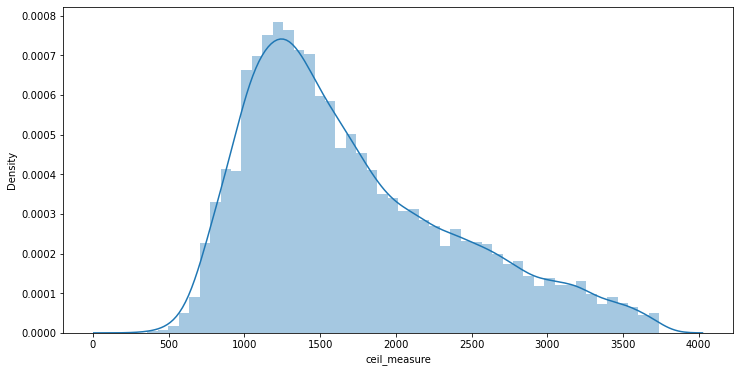

In [42]:
# ceil_measure
print("Skewness is :", hp.ceil_measure.skew())
plt.figure(figsize=(12,6))
sns.distplot(hp.ceil_measure)
hp.ceil_measure.describe()

After treating outliers of ceil_measure, the data has reduced by about 600(~3%) data points but data is nicely distributed

# basement

In [43]:
lowerbound_base,upperbound_base = outlier_removal(hp.basement)
print(lowerbound_base,upperbound_base)

-855.0 1425.0


In [44]:
hp[(hp.basement < lowerbound_base) | (hp.basement > upperbound_base)]

dayhours      price  room_bed  room_bath  living_measure  \
88     20140715.0  1380000.0       5.0       4.00          3760.0   
145    20140612.0  1330000.0       5.0       2.25          3200.0   
146    20150410.0  1610000.0       4.0       3.50          3920.0   
173    20140618.0   975000.0       4.0       2.50          4270.0   
185    20140724.0   379000.0       5.0       2.75          3000.0   
...           ...        ...       ...        ...             ...   
21434  20150320.0   595000.0       5.0       2.75          3740.0   
21439  20150217.0   345000.0       5.0       2.50          3150.0   
21452  20150506.0   390000.0       4.0       2.25          3060.0   
21496  20150423.0  1050000.0       6.0       4.00          5310.0   
21504  20140528.0  1400000.0       4.0       3.25          4700.0   

       lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
88         22763.0   1.0    0.0    3.0        4.0     11.0        1910.0   
145        20158.0   1.0    0.0    0.0        3.0      8.0        1600.0   
146        19088.0   1.0    0.0    1.0        3.0     10.0        2240.0   
173        43386.0   1.0    0.0    0.0        3.0     10.0        2680.0   
185        25175.0   1.0    0.0    0.0        4.0      7.0        1500.0   
...            ...   ...    ...    ...        ...      ...           ...   
21434       6750.0   1.0    0.0    0.0        4.0      8.0        1980.0   
21439       9134.0   1.0    0.0    0.0        4.0      8.0        1640.0   
21452       7920.0   1.0    0.0    0.0        3.0      7.0        1530.0   
21496      12741.0   2.0    0.0    2.0        3.0     10.0        3600.0   
21504       9160.0   1.0    0.0    4.0        3.0     11.0        2520.0   

       basement  yr_built  yr_renovated  living_measure15  lot_measure15  \
88       1850.0    1969.0           0.0            3730.0        11201.0   
145      1600.0    1965.0           0.0            3390.0        20158.0   
146      1680.0    2005.0           0.0            3800.0        13749.0   
173      1590.0    1991.0           0.0            3630.0        36180.0   
185      1500.0    1961.0           0.0            2170.0        40523.0   
...         ...       ...           ...               ...            ...   
21434    1760.0    1978.0           0.0            2620.0         7920.0   
21439    1510.0    1966.0           0.0            1990.0         9133.0   
21452    1530.0    1965.0           0.0            1850.0         7800.0   
21496    1710.0    1967.0           0.0            4190.0        12632.0   
21504    2180.0    2005.0           0.0            2240.0         8700.0   

       furnished  total_area      lat     long  zipcode  
88           1.0     26523.0  47.5333 -122.220  98040.0  
145          0.0     23358.0  47.6303 -122.215  98004.0  
146          1.0     23008.0  47.5760 -122.214  98040.0  
173          1.0     47656.0  47.6915 -122.053  98053.0  
185          0.0     28175.0  47.4970 -122.088  98027.0  
...          ...         ...      ...      ...      ...  
21434        0.0     10490.0  47.7679 -122.261  98028.0  
21439        0.0     12284.0  47.4934 -122.189  98056.0  
21452        0.0     10980.0  47.4879 -122.245  98178.0  
21496        1.0     18051.0  47.5696 -122.213  98040.0  
21504        1.0     13860.0  47.5744 -122.406  98116.0  

[408 rows x 22 columns]

We got 408 records as outliers, let's drop these outliers

In [45]:
# dropping the record from the dataset
hp.drop(hp[ (hp.basement > upperbound_base) | (hp.basement < lowerbound_base) ].index, inplace=True)

<AxesSubplot:xlabel='basement', ylabel='Density'>

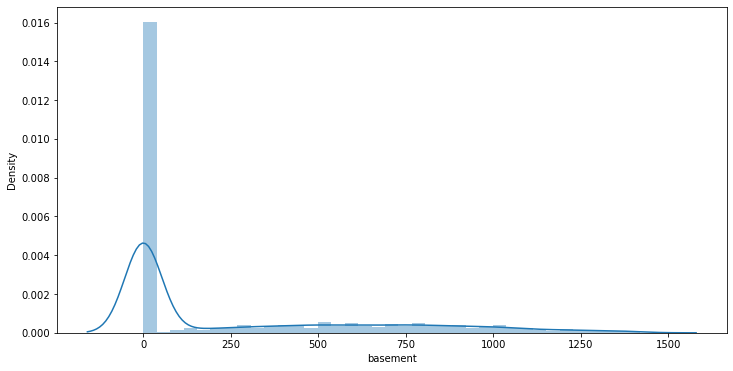

In [46]:
# basement_measure
plt.figure(figsize=(12,6))
sns.distplot(hp.basement)

In [47]:
hp.shape

(20594, 22)

# living_measure

In [48]:
lowerbound_lim,upperbound_lim = outlier_removal(hp.living_measure)
print(lowerbound_lim,upperbound_lim)

-160.0 4000.0


In [49]:
hp[(hp.living_measure < lowerbound_lim) | (hp.living_measure > upperbound_lim)]


dayhours      price  room_bed  room_bath  living_measure  \
7      20140618.0  1160000.0       4.0       3.50          4680.0   
468    20141006.0  1150000.0       5.0       3.50          4350.0   
573    20141006.0  1150000.0       6.0       3.75          4090.0   
724    20150402.0  1150000.0       4.0       3.00          4160.0   
788    20141226.0   865950.0       5.0       3.50          4890.0   
...           ...        ...       ...        ...             ...   
20928  20141029.0  2250000.0       4.0       3.50          4440.0   
21103  20140512.0   900000.0       4.0       3.25          4700.0   
21339  20140528.0   700000.0       4.0       3.50          4490.0   
21436  20150320.0  1290000.0       5.0       4.00          4050.0   
21559  20150421.0  1390000.0       4.0       3.50          4010.0   

       lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
7           9700.0   2.0    0.0    0.0        3.0     10.0        3360.0   
468         6218.0   2.0    0.0    2.0        3.0     10.0        3520.0   
573        49542.0   2.0    0.0    0.0        3.0      9.0        3100.0   
724        13170.0   2.0    0.0    0.0        3.0     11.0        3040.0   
788        12039.0   2.0    0.0    0.0        3.0      9.0        3590.0   
...            ...   ...    ...    ...        ...      ...           ...   
20928       8125.0   2.0    0.0    3.0        5.0     10.0        3140.0   
21103      38412.0   2.0    0.0    0.0        3.0     10.0        3420.0   
21339       5099.0   2.0    0.0    0.0        3.0      9.0        3390.0   
21436      11358.0   2.0    0.0    0.0        4.0     10.0        2780.0   
21559      10880.0   2.0    0.0    3.0        4.0     11.0        3150.0   

       basement  yr_built  yr_renovated  living_measure15  lot_measure15  \
7        1320.0    2005.0           0.0            2800.0        12343.0   
468       830.0    2007.0           0.0            3260.0         5989.0   
573       990.0    1984.0           0.0            2980.0        43357.0   
724      1120.0    2001.0           0.0            3780.0        13148.0   
788      1300.0    2014.0           0.0            4590.0        10079.0   
...         ...       ...           ...               ...            ...   
20928    1300.0    1922.0           0.0            3990.0         8505.0   
21103    1280.0    1978.0           0.0            3640.0        35571.0   
21339    1100.0    2006.0           0.0            4290.0         5537.0   
21436    1270.0    1980.0           0.0            3120.0        13555.0   
21559     860.0    1990.0           0.0            3530.0        17310.0   

       furnished  total_area      lat     long  zipcode  
7            1.0     14380.0  47.5703 -122.165  98006.0  
468          1.0     10568.0  47.5396 -121.997  98027.0  
573          1.0     53632.0  47.6408 -122.153  98005.0  
724          1.0     17330.0  47.5182 -122.149  98059.0  
788          1.0     16929.0  47.7338 -122.208  98011.0  
...          ...         ...      ...      ...      ...  
20928        1.0     12565.0  47.5744 -122.283  98144.0  
21103        1.0     43112.0  47.6445 -122.167  98005.0  
21339        1.0      9589.0  47.5394 -121.861  98065.0  
21436        1.0     15408.0  47.5600 -122.225  98040.0  
21559        1.0     14890.0  47.5359 -122.213  98040.0  

[178 rows x 22 columns]

In [50]:
hp.drop(hp[ (hp.living_measure > upperbound_lim) | (hp.living_measure < lowerbound_lim) ].index, inplace=True)

<AxesSubplot:xlabel='living_measure', ylabel='Density'>

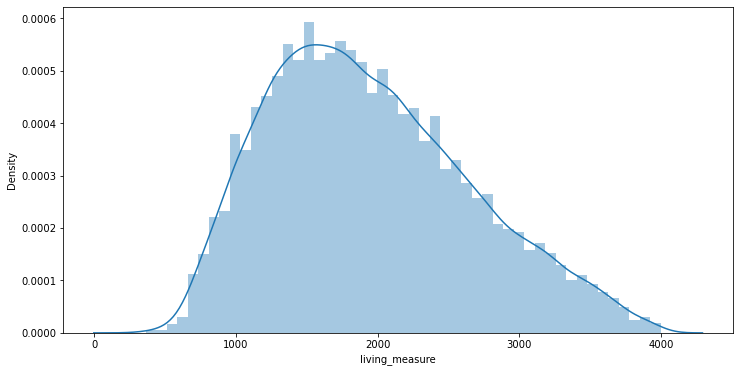

In [51]:
plt.figure(figsize=(12,6))
sns.distplot(hp.living_measure)

After treating outliers of living_measure, we deducted 178 data points more and data distribution looks normal.

In [52]:
# shape of the data after removing outliers in living_column
hp.shape

(20416, 22)

# lot_measure

In [53]:
lowerbound_lom,upperbound_lom = outlier_removal(hp.lot_measure)
print(lowerbound_lom,upperbound_lom)

-2774.875 17958.125


In [54]:
hp[(hp.lot_measure < lowerbound_lom) | (hp.lot_measure > upperbound_lom)]


dayhours     price  room_bed  room_bath  living_measure  lot_measure  \
12     20141029.0  480000.0       3.0       2.50          2450.0      28185.0   
25     20141230.0  250000.0       1.0       1.00           720.0     123710.0   
28     20140829.0  635000.0       4.0       2.50          2470.0      77550.0   
37     20140610.0  740000.0       3.0       2.50          3000.0      25341.0   
87     20140904.0  505000.0       3.0       1.50          1830.0     217800.0   
...           ...       ...       ...        ...             ...          ...   
21581  20141019.0  549950.0       3.0       1.75          2930.0     266587.0   
21582  20140826.0  255000.0       2.0       1.00          1610.0      19965.0   
21589  20150506.0  513000.0       3.0       2.50          2150.0     161607.0   
21608  20150310.0  685530.0       4.0       2.50          3130.0      60467.0   
21610  20140905.0  998000.0       3.0       3.75          3710.0      34412.0   

       ceil  coast  sight  condition  quality  ceil_measure  basement  \
12      2.0    0.0    0.0        3.0      9.0        2450.0       0.0   
25      1.0    0.0    0.0        4.0      6.0         720.0       0.0   
28      1.0    0.0    0.0        4.0      7.0        2470.0       0.0   
37      2.0    0.0    0.0        3.0      9.0        3000.0       0.0   
87      1.0    0.0    0.0        3.0      7.0        1010.0     820.0   
...     ...    ...    ...        ...      ...           ...       ...   
21581   2.0    0.0    0.0        3.0      8.0        2440.0     490.0   
21582   1.0    0.0    0.0        3.0      7.0        1610.0       0.0   
21589   2.0    0.0    0.0        3.0      7.0        1330.0     820.0   
21608   2.0    0.0    0.0        3.0      9.0        3130.0       0.0   
21610   2.0    0.0    0.0        3.0     10.0        2910.0     800.0   

       yr_built  yr_renovated  living_measure15  lot_measure15  furnished  \
12       1990.0           0.0            2440.0        33541.0        1.0   
25       1935.0           0.0            1860.0       297514.0        0.0   
28       1987.0           0.0            2490.0        40894.0        0.0   
37       1995.0           0.0            3000.0        32417.0        1.0   
87       1981.0           0.0            2450.0       165963.0        0.0   
...         ...           ...               ...            ...        ...   
21581    1995.0           0.0            2700.0       438213.0        0.0   
21582    1952.0           0.0            2100.0        28400.0        0.0   
21589    1995.0           0.0            2400.0       207781.0        0.0   
21608    1996.0           0.0            2780.0        44224.0        1.0   
21610    1978.0           0.0            2390.0        34412.0        1.0   

       total_area      lat     long  zipcode  
12        30635.0  47.4665 -122.122  98058.0  
25       124430.0  47.2893 -122.084  98092.0  
28        80020.0  47.5888 -122.011  98075.0  
37        28341.0  47.6724 -122.013  98053.0  
87       219630.0  47.6277 -121.972  98053.0  
...           ...      ...      ...      ...  
21581    269517.0  47.6991 -121.947  98014.0  
21582     21575.0  47.5095 -122.313  98168.0  
21589    163757.0  47.4178 -121.937  98038.0  
21608     63597.0  47.6618 -121.962  98014.0  
21610     38122.0  47.5888 -122.040  98075.0  

[2126 rows x 22 columns]

In [55]:
# dropping the record from the dataset
hp.drop(hp[(hp.lot_measure > upperbound_lom) | (hp.lot_measure < lowerbound_lom) ].index, inplace=True)

<AxesSubplot:xlabel='lot_measure', ylabel='Density'>

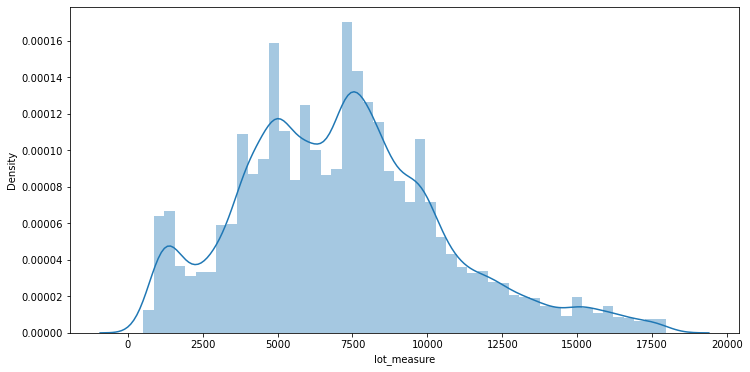

In [56]:
plt.figure(figsize=(12,6))
sns.distplot(hp.lot_measure)

In [57]:
hp.shape

(18290, 22)

# room_bed

In [58]:
#As we know for room_bed = 33 was outlier from our earlier findings, let's see the record and drop it
hp[hp['room_bed']==33]

dayhours     price  room_bed  room_bath  living_measure  lot_measure  \
16913  20140625.0  640000.0      33.0       1.75          1620.0       6000.0   

       ceil  coast  sight  condition  quality  ceil_measure  basement  \
16913   1.0    0.0    0.0        5.0      7.0        1040.0     580.0   

       yr_built  yr_renovated  living_measure15  lot_measure15  furnished  \
16913    1947.0           0.0            1330.0         4700.0        0.0   

       total_area      lat     long  zipcode  
16913      7620.0  47.6878 -122.331  98103.0

In [59]:
# dropping the record from the dataset
hp.drop(hp[(hp.room_bed == 33) ].index, inplace=True)

<AxesSubplot:xlabel='room_bed', ylabel='Density'>

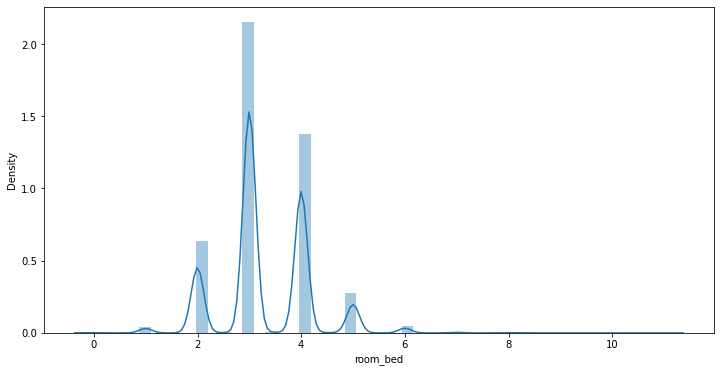

In [60]:
plt.figure(figsize=(12,6))
sns.distplot(hp.room_bed)

In [61]:
hp.shape

(18289, 22)

# CLEANED DATA

In [62]:
hp['room_bath'] = hp['room_bath'].apply(np.round)

In [63]:
hp['room_bath'] = hp['room_bath'].astype(str)
hp['room_bath'] = hp['room_bath'].apply(lambda x: x.replace(".0","")).astype(int)

In [64]:
hp.dayhours=pd.to_datetime(hp.dayhours,format='%Y%m%d')
hp['month/year']=hp['dayhours'].apply(lambda x: x.strftime('%B/%Y'))

In [65]:
hp[["ceil","coast","condition","yr_built","total_area"]] = hp[["ceil","coast","condition","yr_built","total_area"]].apply(lambda x: x.replace(".0","")).astype(int)

In [66]:
hp[["price","room_bed","living_measure","lot_measure","sight","quality","ceil_measure","basement","yr_renovated","living_measure15","lot_measure15","furnished"]] = hp[["price","room_bed","living_measure","lot_measure","sight","quality","ceil_measure","basement","yr_renovated","living_measure15","lot_measure15","furnished"]].apply(lambda x: x.replace(".0","")).astype(int)

In [67]:
hp["ceil"] = hp["ceil"].astype(str)
hp["ceil"] = hp["ceil"].apply(lambda x: x.replace(".5","")).astype(int)

In [68]:
hp["zipcode"] = hp["zipcode"].astype(str)
hp["zipcode"] = hp["zipcode"].apply(lambda x: x.replace(".0","")).astype(int)

Here, I have rounded off the value of Bathroom and also i have removed .0 & .5 values from every variable because they were of no use and have to be cleaned. So, that we can make our further process easy to understand and clean.

In [69]:
hp.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0 2015-04-27  600000         4          2            3050         9440     1   
1 2015-03-17  190000         2          1             670         3101     1   
2 2014-08-20  735000         4          3            3040         2415     2   
3 2014-10-10  257000         3          2            1740         3721     2   
4 2015-02-18  450000         2          1            1120         4590     1   

   coast  sight  condition  quality  ceil_measure  basement  yr_built  \
0      0      0          3        8          1800      1250      1966   
1      0      0          4        6           670         0      1948   
2      1      4          3        8          3040         0      1966   
3      0      0          3        8          1740         0      2009   
4      0      0          3        7          1120         0      1924   

   yr_renovated  living_measure15  lot_measure15  furnished  total_area  \
0             0              2020           8660          0       12490   
1             0              1660           4100          0        3771   
2             0              2620           2433          0        5455   
3             0              2030           3794          0        5461   
4             0              1120           5100          0        5710   

       lat     long  zipcode     month/year  
0  47.7228 -122.183    98034     April/2015  
1  47.5546 -122.274    98118     March/2015  
2  47.5188 -122.256    98118    August/2014  
3  47.3363 -122.213    98002   October/2014  
4  47.5663 -122.285    98118  February/2015

In [70]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18289 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          18289 non-null  datetime64[ns]
 1   price             18289 non-null  int32         
 2   room_bed          18289 non-null  int32         
 3   room_bath         18289 non-null  int32         
 4   living_measure    18289 non-null  int32         
 5   lot_measure       18289 non-null  int32         
 6   ceil              18289 non-null  int32         
 7   coast             18289 non-null  int32         
 8   sight             18289 non-null  int32         
 9   condition         18289 non-null  int32         
 10  quality           18289 non-null  int32         
 11  ceil_measure      18289 non-null  int32         
 12  basement          18289 non-null  int32         
 13  yr_built          18289 non-null  int32         
 14  yr_renovated      1828

# Analysis of dayhours

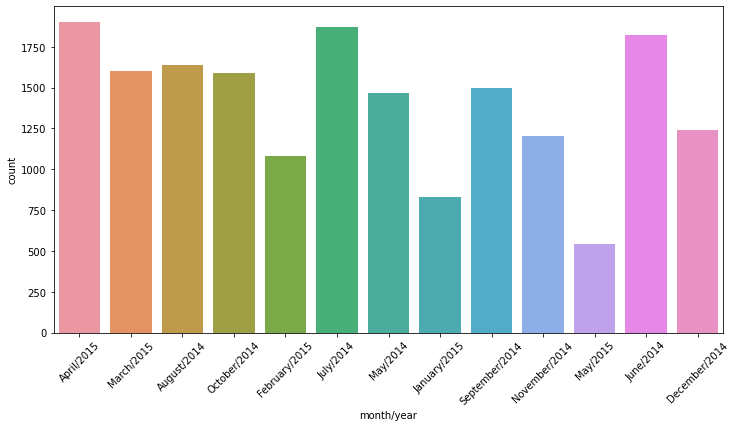

In [71]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)
sns.countplot(hp['month/year']);

From the above, we can conclude that in april 2015 and june and july of 2014 most houses are sold.

In [72]:
hp.groupby(['month/year'])['price'].agg('mean')

month/year
April/2015        507327.633018
August/2014       480635.503360
December/2014     469974.957224
February/2015     462635.759704
January/2015      465124.644150
July/2014         491450.990928
June/2014         501607.509341
March/2015        499022.900249
May/2014          492102.350614
May/2015          502737.100917
November/2014     467927.724252
October/2014      478020.134047
September/2014    478270.602804
Name: price, dtype: float64

April month have the highest mean price in the time line of the sales of the properties is from May-2014 to May-2015.

# Univariant Analysis of each column

## Analysis of room_bed

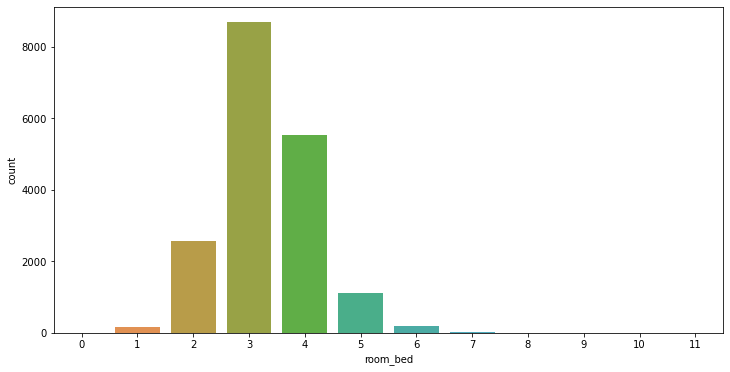

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(hp.room_bed);

Most of the houses have 3 or 4 bedrooms.

# Analysis of room_bath

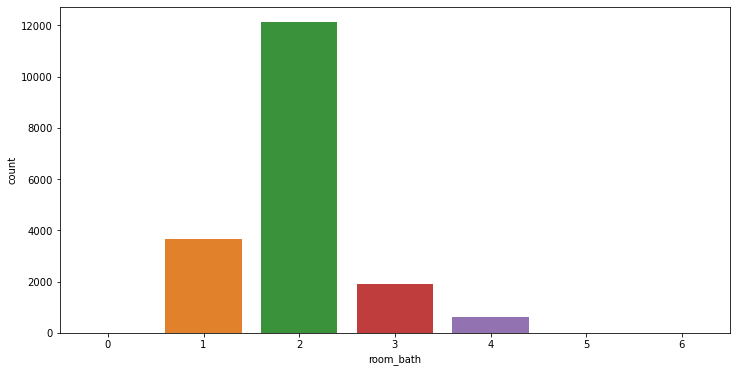

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(hp.room_bath);

Majority of the houses have 2 bathroom followed by 1 & 3.

# Ceil

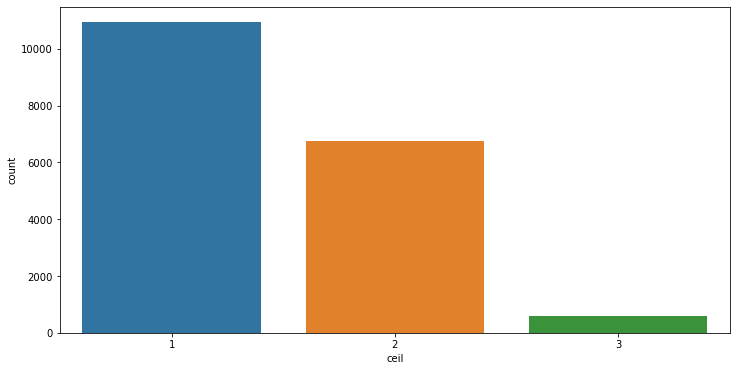

In [75]:
plt.figure(figsize=(12,6))
sns.countplot('ceil',data=hp);

Most houses have 1 or 2 floors

# Coast

0    18227
1       62
Name: coast, dtype: int64

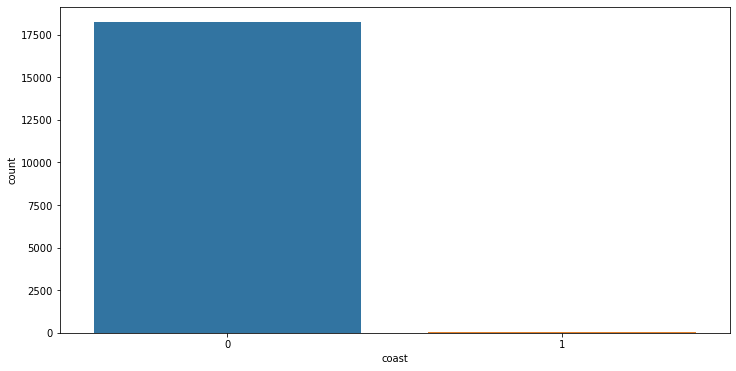

In [76]:
plt.figure(figsize=(12,6))
sns.countplot('coast',data=hp);
hp.coast.value_counts()

most houses don't have waterfront view, very few are waterfront.

# Sight

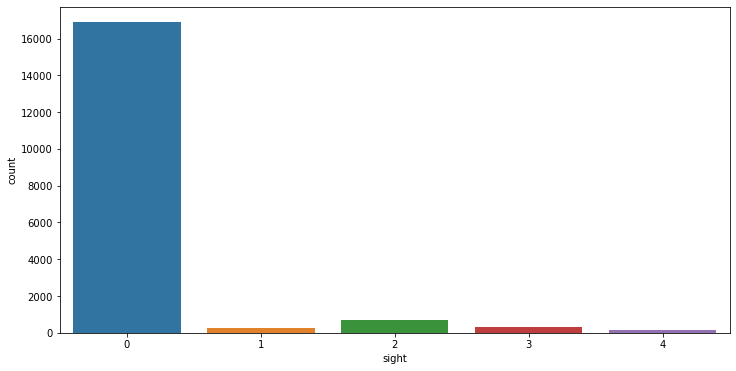

In [77]:
plt.figure(figsize=(12,6))
sns.countplot('sight',data=hp);

Most sights have not been viewed.

# Condition

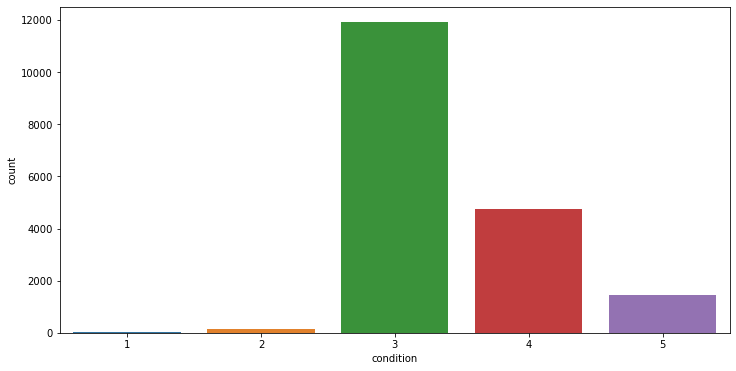

In [78]:
plt.figure(figsize=(12,6))
sns.countplot('condition',data=hp);

Overall most houses are rated as 3 and above for its condition overall.

# Quality

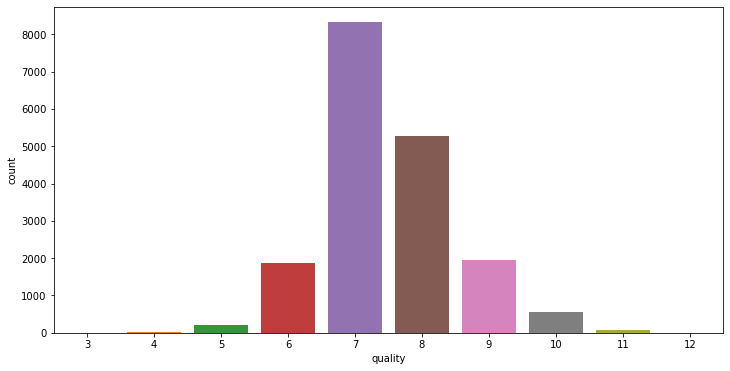

In [79]:
plt.figure(figsize=(12,6))
sns.countplot('quality',data=hp);

Most of the housing unit have been given grade 7 followed by 8 & 9.

# Analysis of yr_built

<AxesSubplot:xlabel='yr_built', ylabel='Density'>

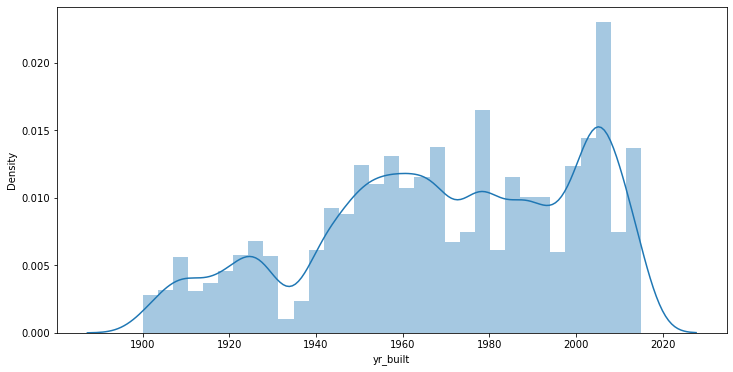

In [80]:
plt.figure(figsize=(12,6))
sns.distplot(hp.yr_built)

The built year of the properties range from 1900 to 2014 and we can see upward trend with time.

# Analysis of yr_renovated

<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

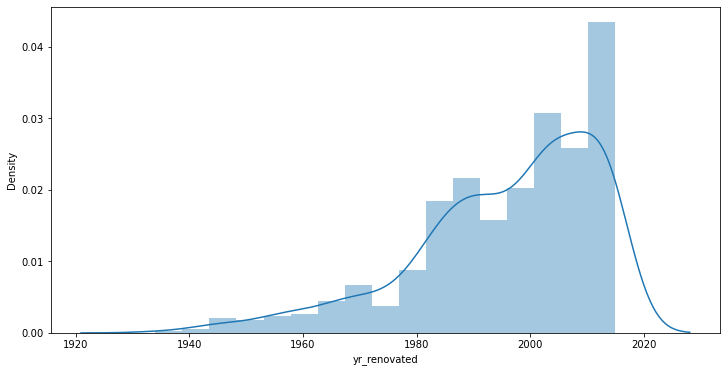

In [81]:
hp_reno=hp[hp['yr_renovated']>0]
plt.figure(figsize=(12,6))
sns.distplot(hp_reno.yr_renovated)

There is an upward trend in renovation's continuing from 1980.

# Furnished

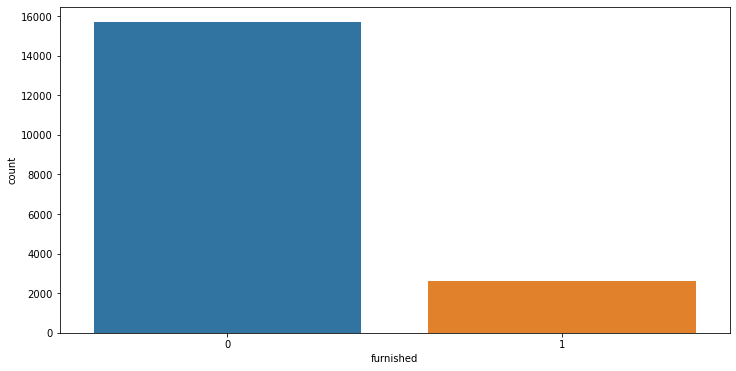

In [82]:
plt.figure(figsize=(12,6))
sns.countplot('furnished',data=hp);

## Bivariate Analysis

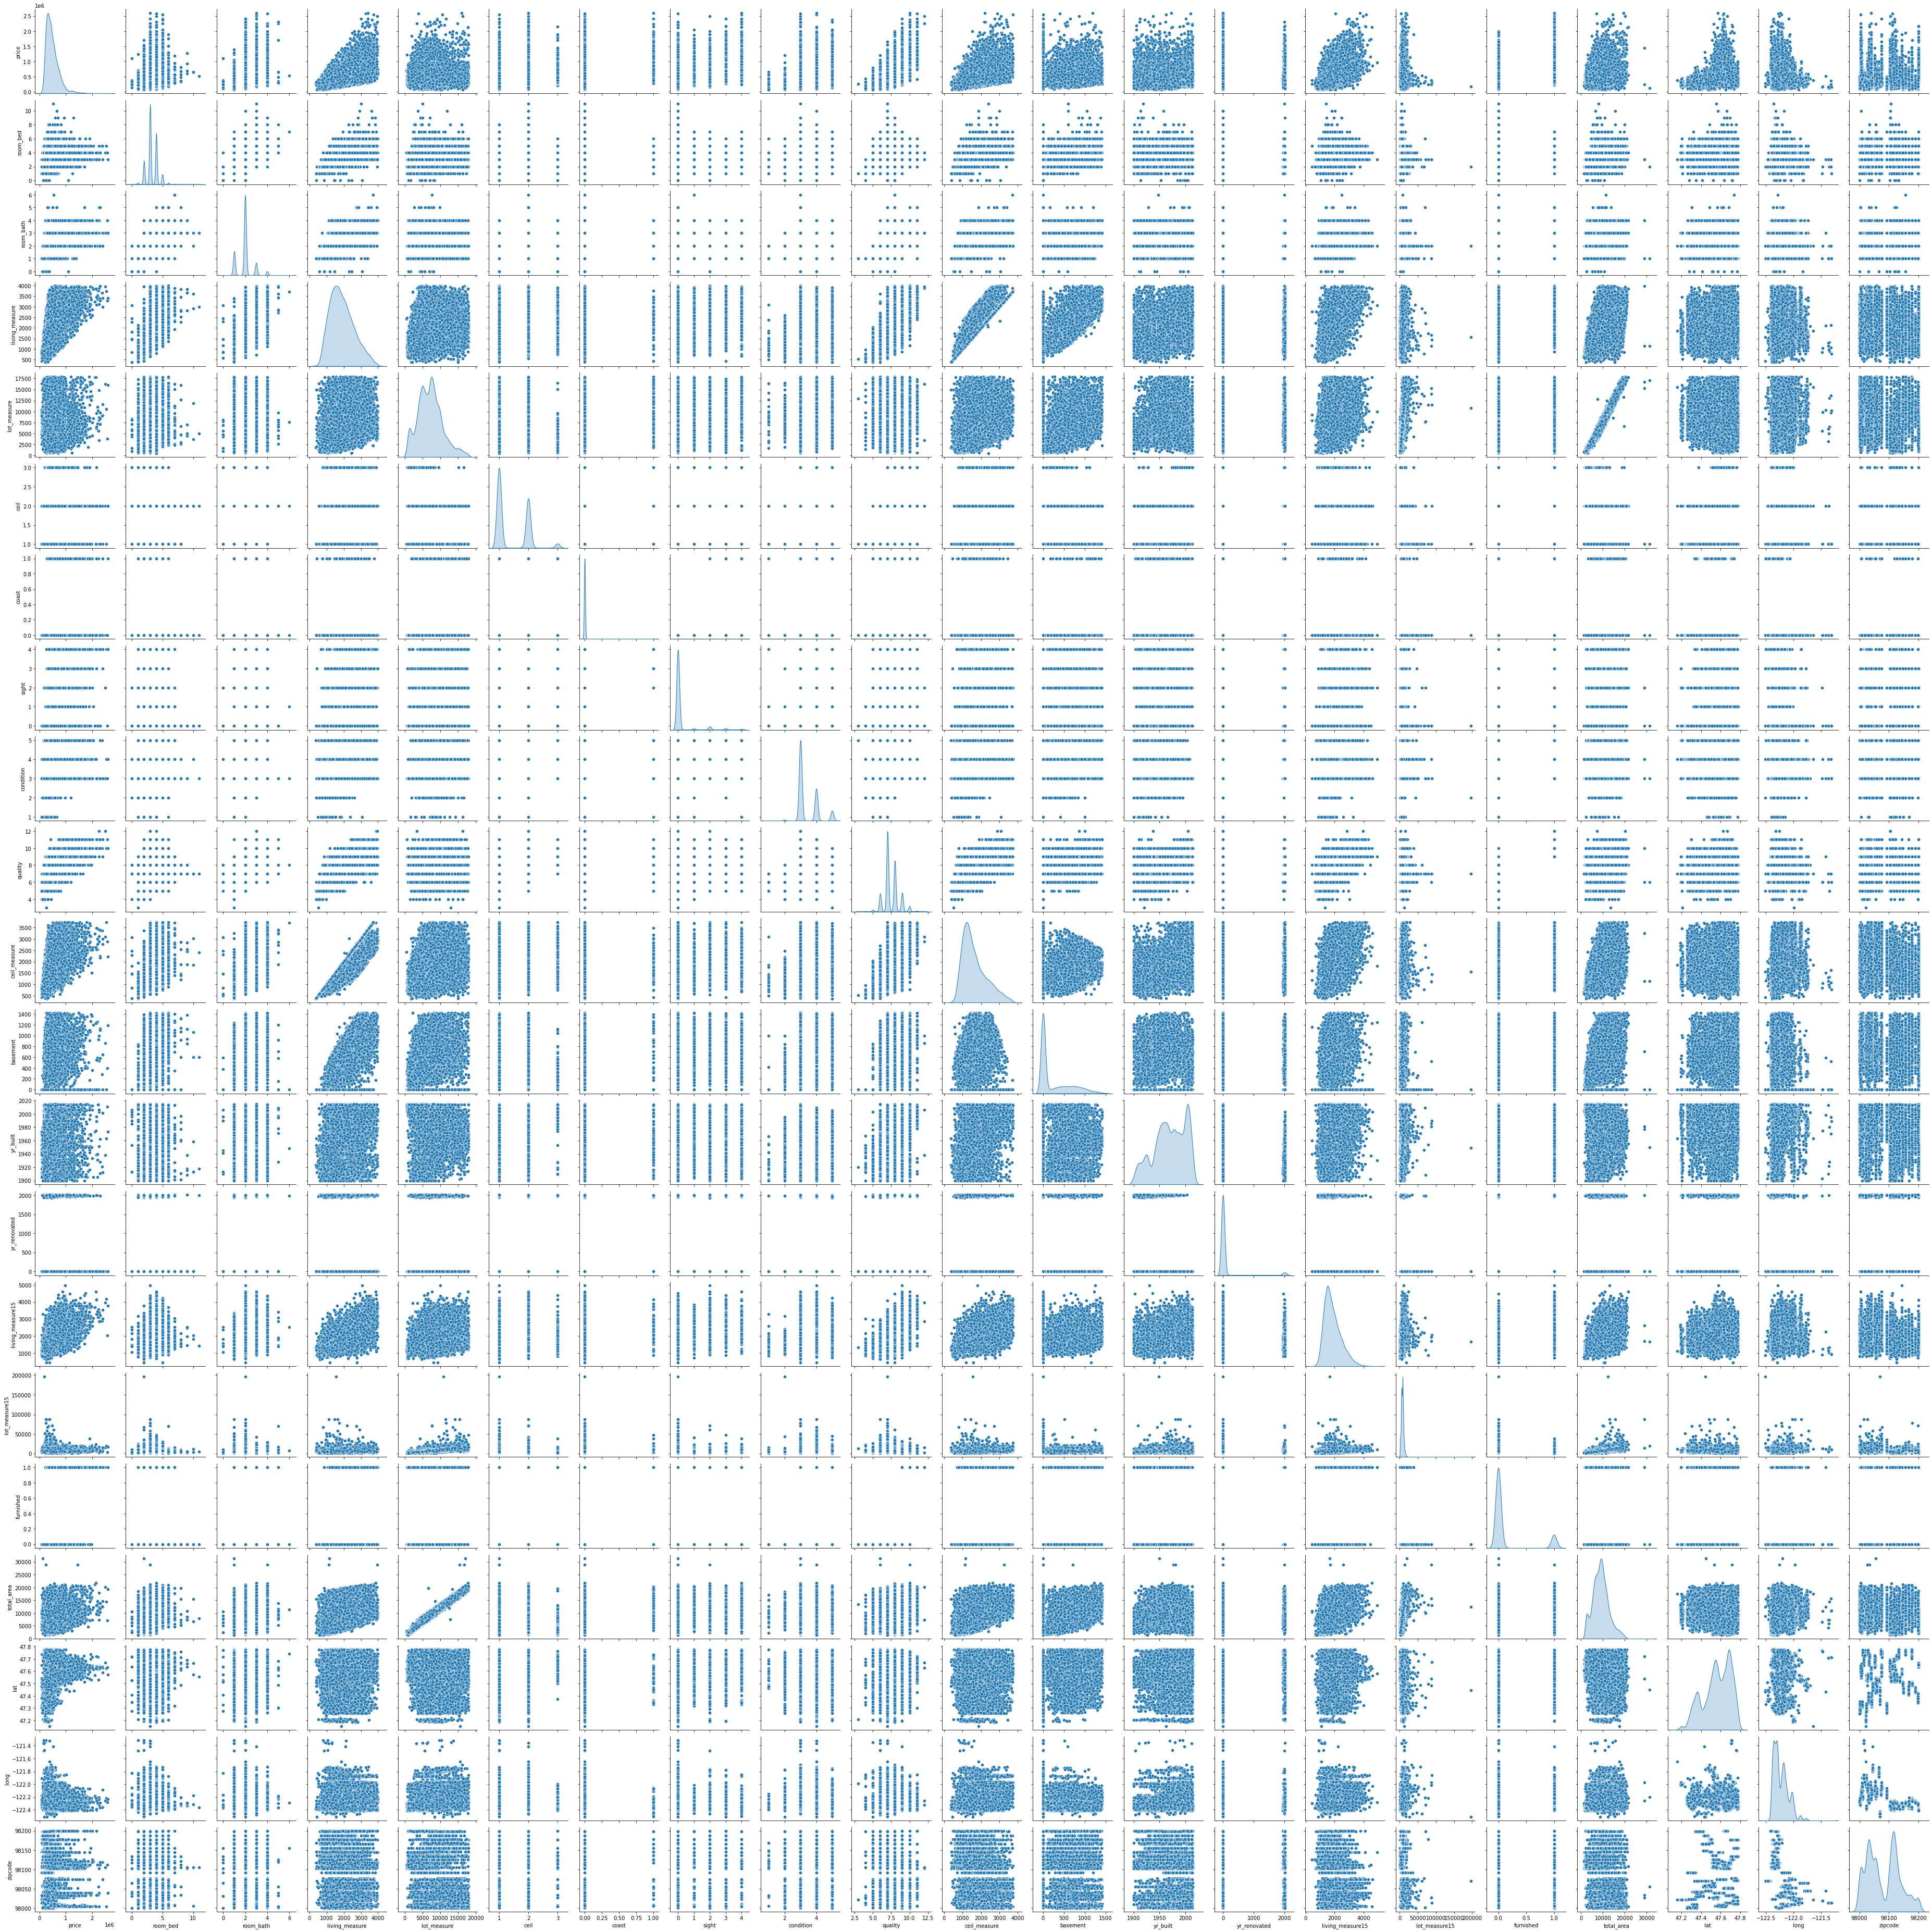

In [83]:
sns.pairplot(hp, diag_kind = 'kde');

price: price distribution is Right-Skewed as we deduced earlier from our 5-factor analysis

room_bed: our target variable (price) and room_bed plot is not linear. It's distribution have lot of gaussians

room_bath: It's plot with price has somewhat linear relationship. Distribution has number of gaussians.

living_measure: Plot against price has strong linear relationship. It also have linear relationship with room_bath variable. So 
might remove one of these 2. Distribution is Right-Skewed.

lot_measure: No clear relationship with price.

ceil: No clear relationship with price. We can see, it's have 6 unique values only. Therefore, we can convert this column into categorical column for values.

coast: No clear relationship with price. Clearly it's categorical variable with 2 unique values.

sight: No clear relationship with price. This has 5 unique values. Can be converted to Categorical variable.

condition: No clear relationship with price. This has 5 unique values. Can be converted to Categorical variable.

quality: Somewhat linear relationship with price. Has discrete values from 1 - 13. Can be converted to Categorical variable.

ceil_measure: Strong linear relationship with price. Also with room_bath and living_measure features. Distribution is Right-Skewed.

basement: No clear relationship with price.

yr_built: No clear relationship with price.

yr_renovated: No clear relationship with price. Have 2 unique values. Can be converted to Categorical Variable which tells whether house is renovated or not.

zipcode, lat, long: No clear relationship with price or any other feature.

living_measure15: Somewhat linear relationship with target feature. It's same as living_measure. Therefore we can drop this variable.

lot_measure15: No clear relationship with price or any other feature.

furnished: No clear relationship with price or any other feature. 2 unique values so can be converted to Categorical Variable

total_area: No clear relationship with price. But it has Very Strong linear relationship with lot_measure. So one of it can be dropped.

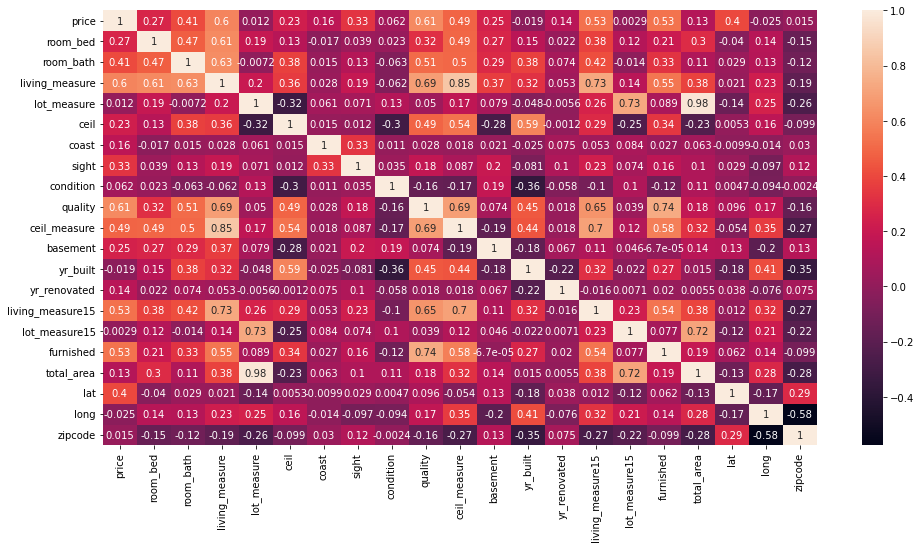

In [84]:
# Plotting heatmap
plt.subplots(figsize =(16, 8)) 
sns.heatmap(hp.corr(),annot=True);

We have linear relationships in below featues as we got to know from above matrix

1.price: room_bath, living_measure, quality, living_measure15, furnished

2.living_measure: price, room_bath. So we can consider dropping 'room_bath' variable.

3.quality: price, room_bath, living_measure

4.ceil_measure: price, room_bath, living_measure, quality

5.living_measure15: price, living_measure, quality. So we can consider dropping living_measure15 as well. As it's giving same info as living_measure.

6.lot_measure15: lot_measure. Therefore, we can consider dropping lot_measure15, as it's giving same info.

7.furnished: quality

8.total_area: lot_measure, lot_measure15. Therefore, we can consider dropping total_area feature as well. As it's giving same info as lot_measure.

## Bivariate Analysis of Variables

### month_year

mean    median  size
month/year                                   
April/2015      507327.633018  450000.0  1902
August/2014     480635.503360  420000.0  1637
December/2014   469974.957224  406000.0  1239
February/2015   462635.759704  406375.0  1082
January/2015    465124.644150  400000.0   829
July/2014       491450.990928  438500.0  1874
June/2014       501607.509341  441000.0  1820
March/2015      499022.900249  432625.0  1604
May/2014        492102.350614  435555.0  1466
May/2015        502737.100917  440000.0   545
November/2014   467927.724252  415000.0  1204
October/2014    478020.134047  422500.0  1589
September/2014  478270.602804  427500.0  1498

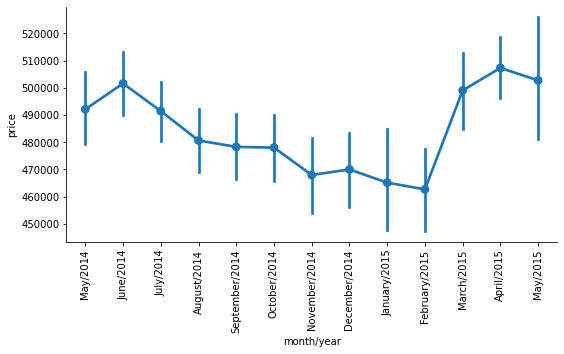

In [85]:
hp['month/year'] = pd.to_datetime(hp['month/year'], format='%B/%Y')
hp.sort_values(["month/year"], axis=0, ascending=True, inplace=True) 
hp["month/year"] = hp["month/year"].dt.strftime('%B/%Y')
sns.factorplot(x='month/year',y='price',data=hp, size=4, aspect=2)
plt.xticks(rotation=90)
hp.groupby('month/year')['price'].agg(['mean','median','size'])

The mean price of the houses tend to be high during March,April, May as compared to that of September, October, November,December period.

### room_bed

mean    median  size
room_bed                               
0         362590.000000  304000.0    10
1         313286.847059  297000.0   170
2         397850.747467  375000.0  2566
3         446672.407075  400000.0  8679
4         562585.007401  505000.0  5540
5         618386.443643  545000.0  1109
6         613235.770950  585444.0   179
7         605732.590909  577500.0    22
8         566571.428571  575000.0     7
9         878499.750000  817000.0     4
10        655000.000000  655000.0     2
11        520000.000000  520000.0     1

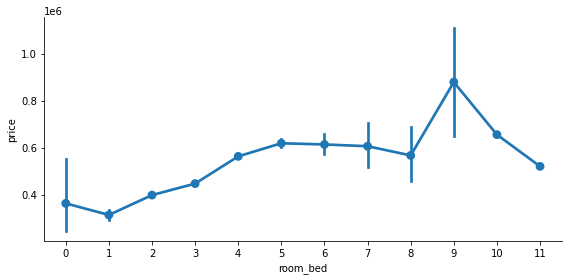

In [86]:
sns.factorplot(x='room_bed',y='price',data=hp, size=4, aspect=2)
hp.groupby('room_bed')['price'].agg(['mean','median','size'])

There is clear increasing trend in price with room_bed

## room_bath

mean    median   size
room_bath                               
0          3.510500e+05  273000.0      9
1          3.479121e+05  320000.0   3647
2          4.830434e+05  436000.0  12118
3          6.567162e+05  595000.0   1895
4          8.354890e+05  775000.0    610
5          1.019611e+06  643500.0      9
6          5.400000e+05  540000.0      1

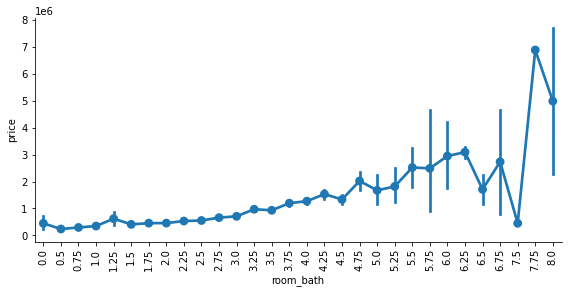

In [87]:
sns.factorplot(x='room_bath',y='price',data=df,size=4, aspect=2)
plt.xticks(rotation=90)
hp.groupby('room_bath')['price'].agg(['mean','median','size'])

Overall mean and median price increares with increasing room_bath there is upward trend in price with increase in room_bath

## living_measure

AxesSubplot(0.125,0.125;0.775x0.755)


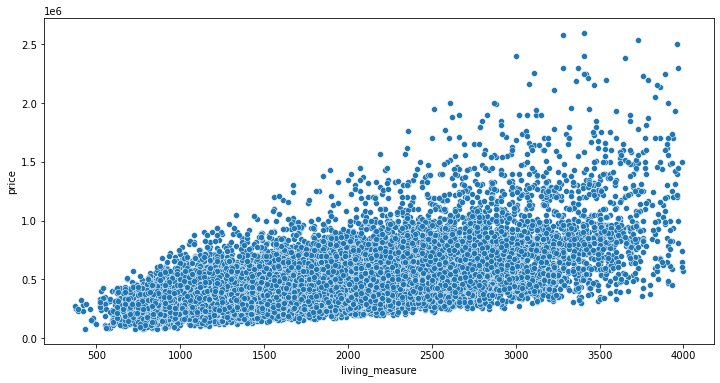

In [88]:
plt.figure(figsize=(12,6));
print(sns.scatterplot(hp['living_measure'],hp['price']));

There is clear increment in price of the property with increment in the living measure

## lot_measure

AxesSubplot(0.125,0.125;0.775x0.755)


count    18289.000000
mean      7152.634042
std       3417.146494
min        520.000000
25%       4800.000000
50%       7120.000000
75%       9142.000000
max      17950.000000
Name: lot_measure, dtype: float64

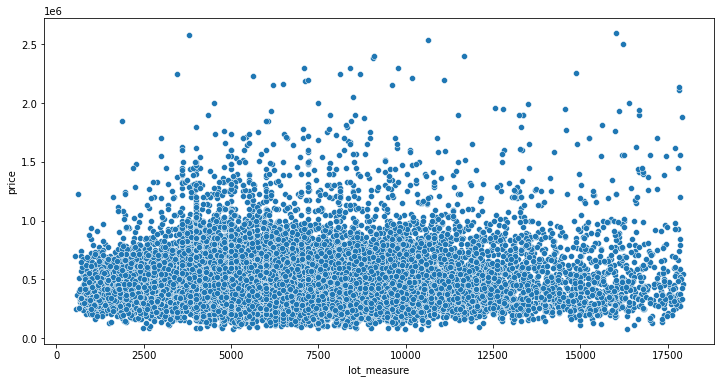

In [89]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['lot_measure'],hp['price']))
hp['lot_measure'].describe()

The figure is not showing any trend it could mean that there is little to no relationship between price and lot_measure.Almost 95% of the houses have <17950 lot_measure.

## ceil

mean    median   size
ceil                                
1     433861.412561  393000.0  10939
2     565689.601272  496000.0   6759
3     541201.898477  481000.0    591

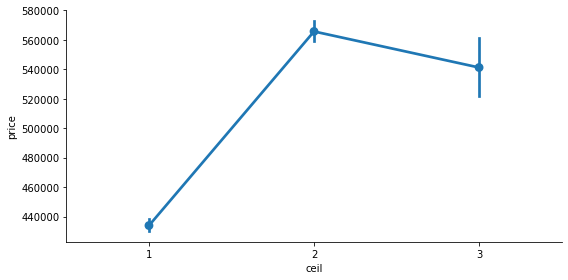

In [90]:
print(sns.factorplot(x='ceil',y='price',data=hp, size = 4, aspect = 2))
hp.groupby('ceil')['price'].agg(['mean','median','size'])

Initially the price is increasing and after that we can see a slight fall in price as it goes further.

## coast

living_measure                   price              
              median         mean     median          mean
coast                                                     
0             1800.0  1898.520108   428000.0  4.836974e+05
1             2165.0  2235.500000  1125000.0  1.177483e+06

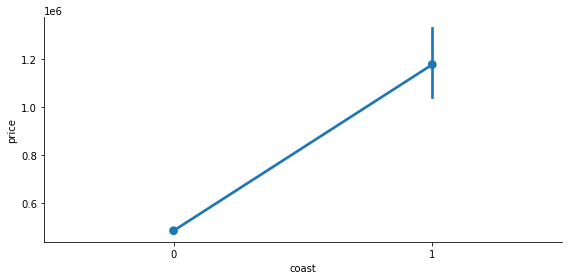

In [91]:
print(sns.factorplot(x='coast',y='price',data=hp, size = 4, aspect = 2))
hp.groupby('coast')['living_measure','price'].agg(['median','mean'])

Mean and median of waterfront view is high however such houses are very small in compare to non-waterfront
Also, living_measure mean and median is greater for waterfront house.
The house properties with water_front tend to have higher price compared to that of non-water_front properties

# Sight

price                  living_measure               
               mean    median   size           mean  median   size
sight                                                             
0      4.635073e+05  415000.0  16890    1862.120604  1770.0  16890
1      6.788832e+05  649975.0    266    2263.500000  2245.0    266
2      6.846175e+05  635000.0    689    2276.008708  2240.0    689
3      8.239130e+05  720000.0    295    2517.647458  2500.0    295
4      1.109926e+06  975000.0    149    2541.899329  2610.0    149

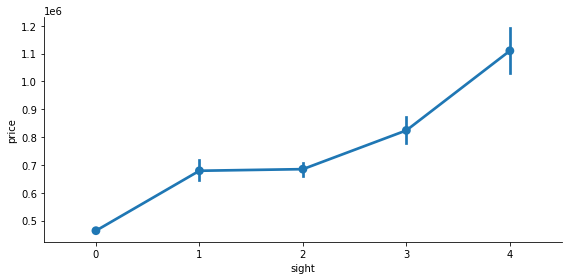

In [92]:
print(sns.factorplot(x='sight',y='price',data=hp, size = 4, aspect = 2))
hp.groupby('sight')['price','living_measure'].agg(['mean','median','size'])

The house sighted more have high price (mean and median) and have large living area as well.
Properties with higher price have more no.of sights compared to that of houses with lower price

AxesSubplot(0.125,0.125;0.775x0.755)


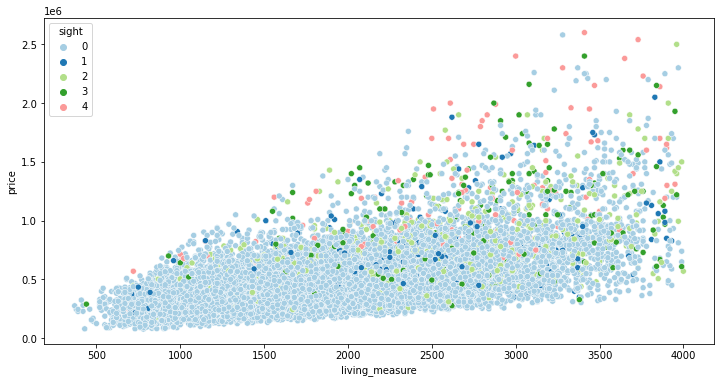

In [93]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['living_measure'],hp['price'],hue=hp['sight'],palette='Paired',legend='full'))

Viewed in relation with price and living_measure
Costlier houses with large living area are sighted more.
The above graph also justify that: Properties with higher price have more no.of sights compared to that of houses with lower price

## condition

price                  living_measure               
                    mean    median   size           mean  median   size
condition                                                              
1          301235.714286  255000.0     21    1231.428571  1010.0     21
2          306112.679104  270630.0    134    1315.522388  1235.0    134
3          483820.057500  428000.0  11913    1955.198523  1850.0  11913
4          476142.186120  420000.0   4755    1790.619558  1730.0   4755
5          555393.478854  500000.0   1466    1865.014325  1800.0   1466

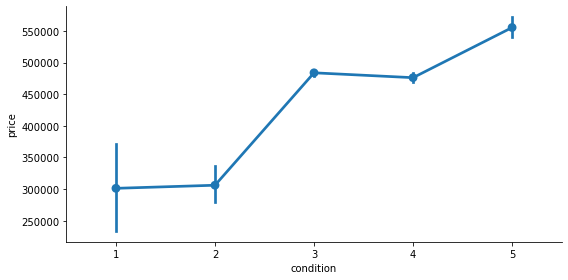

In [94]:
print(sns.factorplot(x='condition',y='price',data=hp, size = 4, aspect = 2))
hp.groupby('condition')['price','living_measure'].agg(['mean','median','size'])

As the condition rating increases its price and living measure mean and median also increases.
The price of the house increases with condition rating of the house

AxesSubplot(0.125,0.125;0.775x0.755)


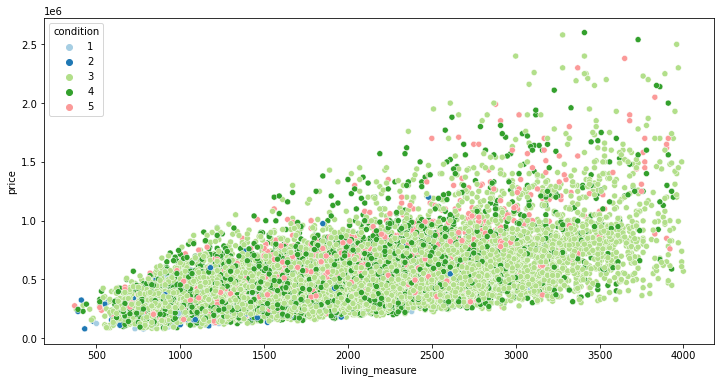

In [95]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['living_measure'],hp['price'],hue=hp['condition'],palette='Paired',legend='full'));

Viewed in relation with price and living_measure. Most houses are rated as 3 or more.
So we found out that smaller houses are in better condition and better condition houses are having higher prices.

## quality

price                  living_measure              
                 mean     median  size           mean  median  size
quality                                                            
3        2.620000e+05   262000.0     1     520.000000   520.0     1
4        1.995262e+05   188000.0    21     601.904762   560.0    21
5        2.418038e+05   225000.0   196     951.591837   855.0   196
6        3.006807e+05   275000.0  1869    1173.516854  1100.0  1869
7        4.002021e+05   371500.0  8325    1662.533093  1610.0  8325
8        5.324621e+05   500000.0  5276    2113.186315  2090.0  5276
9        7.563580e+05   715000.0  1954    2723.395087  2735.0  1954
10       9.787350e+05   858250.0   568    3115.123239  3180.0   568
11       1.246639e+06  1090000.0    77    3395.311688  3450.0    77
12       2.375000e+06  2375000.0     2    3925.000000  3925.0     2

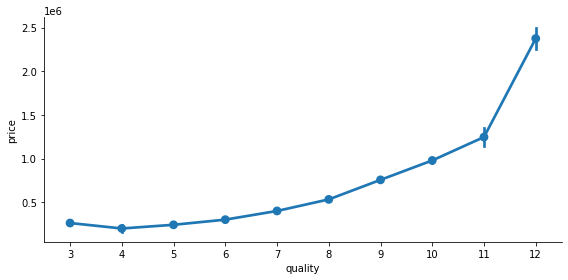

In [96]:
print(sns.factorplot(x='quality',y='price',data=hp, size = 4, aspect = 2))
hp.groupby('quality')['price','living_measure'].agg(['mean','median','size'])

There is clear increase in price of the house with higher rating on quality

AxesSubplot(0.125,0.125;0.775x0.755)


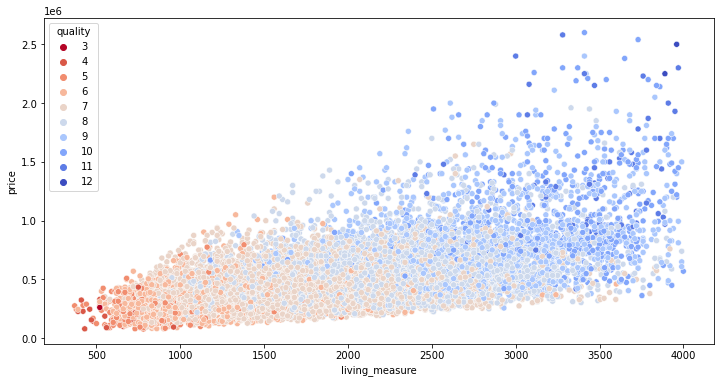

In [97]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['living_measure'],hp['price'],hue=hp['quality'],palette='coolwarm_r', legend='full'))

Viewed in relation with price and living_measure. Most houses are graded as 6 or more.

## ceil_measure

AxesSubplot(0.125,0.125;0.775x0.755)


count    18289.000000
mean      1643.998633
std        658.087882
min        370.000000
25%       1150.000000
50%       1470.000000
75%       2020.000000
max       3740.000000
Name: ceil_measure, dtype: float64

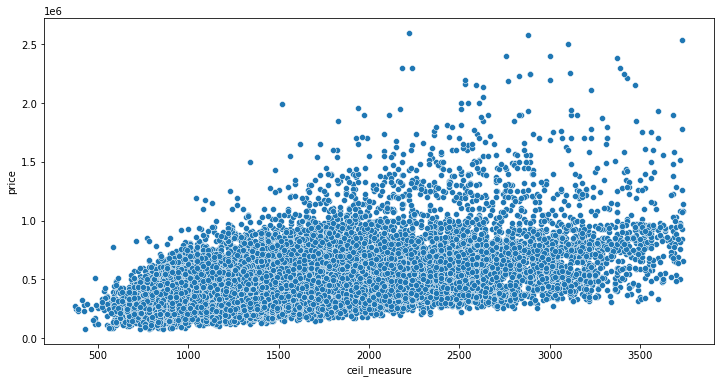

In [98]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['ceil_measure'],hp['price']))
hp['ceil_measure'].describe()

There is upward trend in price with ceil_measure

## basement

AxesSubplot(0.125,0.125;0.775x0.755)


count    18289.000000
mean       255.591394
std        376.940464
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       1420.000000
Name: basement, dtype: float64

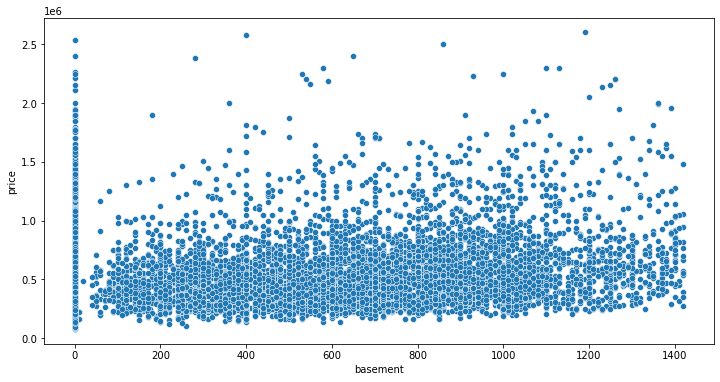

In [99]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['basement'],hp['price']))
hp['basement'].describe()

We will create the categorical variable for basement 'has_basement' for houses with basement and no basement.This categorical variable will be used for further analysis.
Price increases with increase in ceil measure

# Adding a new caegorical variable for looking into the data which houses are having basements and which are not

In [100]:
# Making bins for basements
def create_basement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
hp['has_basement'] = hp['basement'].apply(create_basement_group)

price                  living_measure               
                       mean    median   size           mean  median   size
has_basement                                                              
No            446607.035921  390000.0  11219    1788.872449  1650.0  11219
Yes           548638.188543  490000.0   7070    2075.469165  1990.0   7070

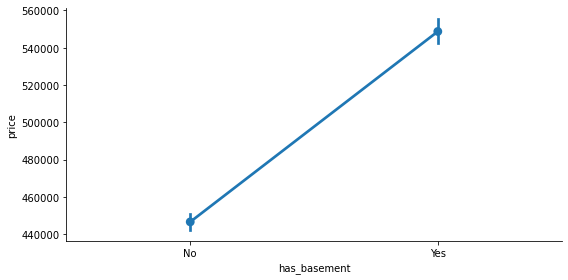

In [101]:
print(sns.factorplot(x='has_basement',y='price',data=hp, size = 4, aspect = 2))
hp.groupby('has_basement')['price','living_measure'].agg(['mean','median','size'])

After binning we data shows with basement houses are costlier and have higher Prices.
The houses with basement has better price compared to that of houses without basement

AxesSubplot(0.125,0.125;0.775x0.755)


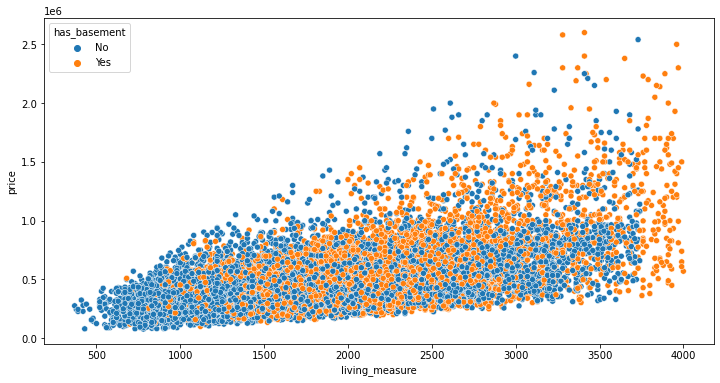

In [102]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['living_measure'],hp['price'],hue=hp['has_basement']))

houses having basement have higher price & living measure

# Yr_built

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median  size
yr_built                               
1900      590996.135802  550000.0    81
1901      557108.344828  550000.0    29
1902      620848.000000  591000.0    25
1903      484705.500000  461000.0    44
1904      527791.837209  478000.0    43
...                 ...       ...   ...
2011      515572.644628  430000.0   121
2012      507776.937888  425000.0   161
2013      563532.751445  505000.0   173
2014      625021.102161  565997.0   509
2015      667531.533333  605805.5    30

[116 rows x 3 columns]

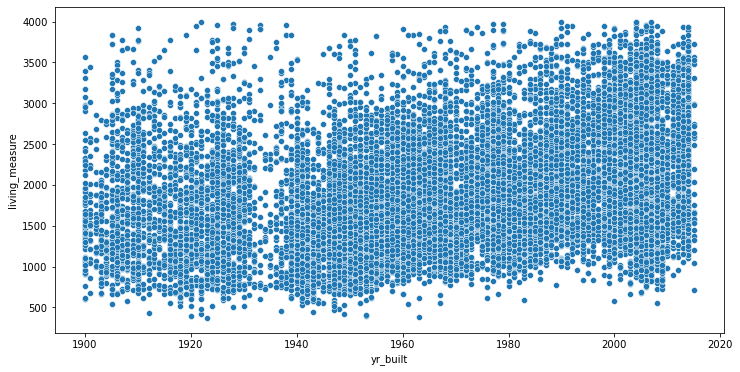

In [103]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['yr_built'],hp['living_measure']))
hp.groupby('yr_built')['price'].agg(['mean','median','size'])

We will create new variable: Houselandratio - This is proportion of living area in the total area of the house. We will explore the trend of price against this houselandratio.

# Creating a new column for calculating the percentage of living space in the house

In [104]:
hp["house_land_ratio"]=np.round((hp['living_measure']/hp['total_area']),2)*100
hp["house_land_ratio"].head()

4886      8.0
9357     17.0
1635     42.0
17531    55.0
17530    34.0
Name: house_land_ratio, dtype: float64

## yr_renovated

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median  size
yr_renovated                               
1934          459950.000000  459950.0     1
1940          378400.000000  378400.0     2
1944          521000.000000  521000.0     1
1945          398666.666667  375000.0     3
1946          351137.500000  351137.5     2
...                     ...       ...   ...
2011          607496.153846  577000.0    13
2012          625181.818182  515000.0    11
2013          600985.000000  518500.0    30
2014          655652.250000  587000.0    84
2015          561250.000000  530500.0    10

[68 rows x 3 columns]

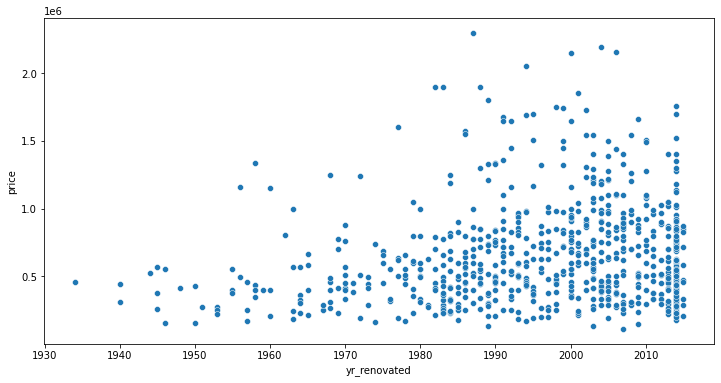

In [105]:
plt.figure(figsize=(12,6))
x=hp[hp['yr_renovated']>0]
print(sns.scatterplot(x['yr_renovated'],x['price']))
x.groupby('yr_renovated')['price'].agg(['mean','median','size'])

So most houses are renovated after 1980's. We will create new categorical variable 'has_renovated' to categorize the property as renovated and non-renovated. For further ananlysis we will use this categorical variable.

# Creating new categorical column for looking that a house is renovated or not

In [106]:
def renovated_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
hp['has_renovated'] = hp['yr_renovated'].apply(renovated_group)

AxesSubplot(0.125,0.125;0.775x0.755)


price                  house_land_ratio              
                       mean    median   size             mean median   size
has_renovated                                                              
No             478764.60231  425000.0  17574        23.907249   21.0  17574
Yes            665100.99021  575000.0    715        25.060140   24.0    715

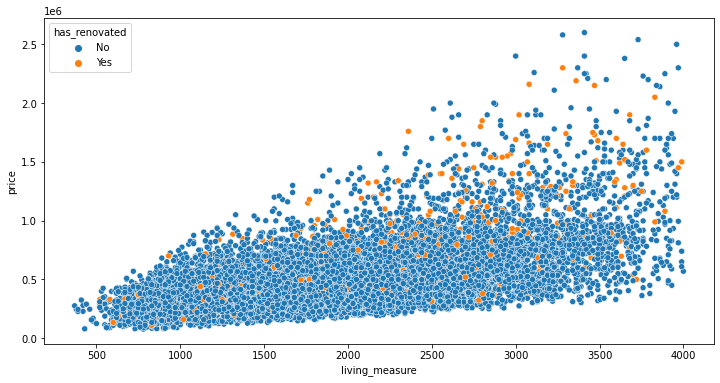

In [107]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['living_measure'],hp['price'],hue=hp['has_renovated']))
hp.groupby(['has_renovated'])['price','house_land_ratio'].agg(['mean','median','size'])

Renovated house utilized more land area for construction of house

Renovated properties have higher price than others with same living measure space.

## furnished

AxesSubplot(0.125,0.125;0.775x0.755)


price                  living_measure                 \
                    mean    median   size           mean  median   size   
furnished                                                                 
0          430609.413321  398000.0  15690    1745.599363  1690.0  15690   
1          820736.681031  755000.0   2599    2829.731820  2850.0   2599   

          house_land_ratio                
                      mean median   size  
furnished                                 
0                23.008540   20.0  15690  
1                29.649865   29.0   2599

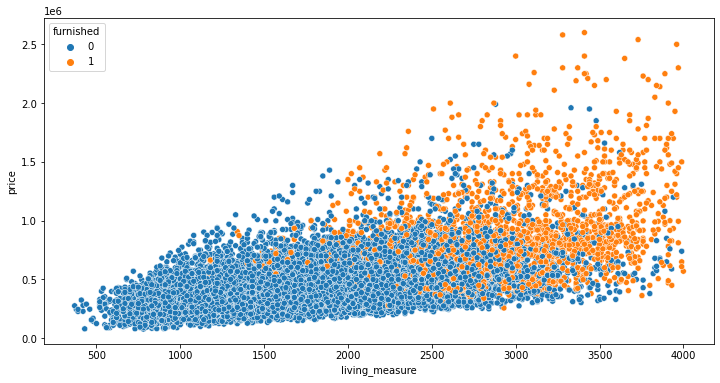

In [108]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(hp['living_measure'],hp['price'],hue=hp['furnished']))
hp.groupby('furnished')['price','living_measure','house_land_ratio'].agg(['mean','median','size'])

Furnished has higher price value and has greater living_measure
Furnished houses have higher price than that of the Non-furnished houses

# Some other analysis

## Looking into the most common house according to number of bedroom

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

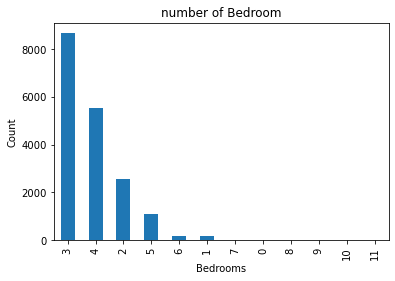

In [109]:
hp['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

we can clearly see that the houses having 3 and 4 number of bedrooms are higher

# Visualizing the location of the houses based on latitude and longitude.

<Figure size 720x720 with 0 Axes>

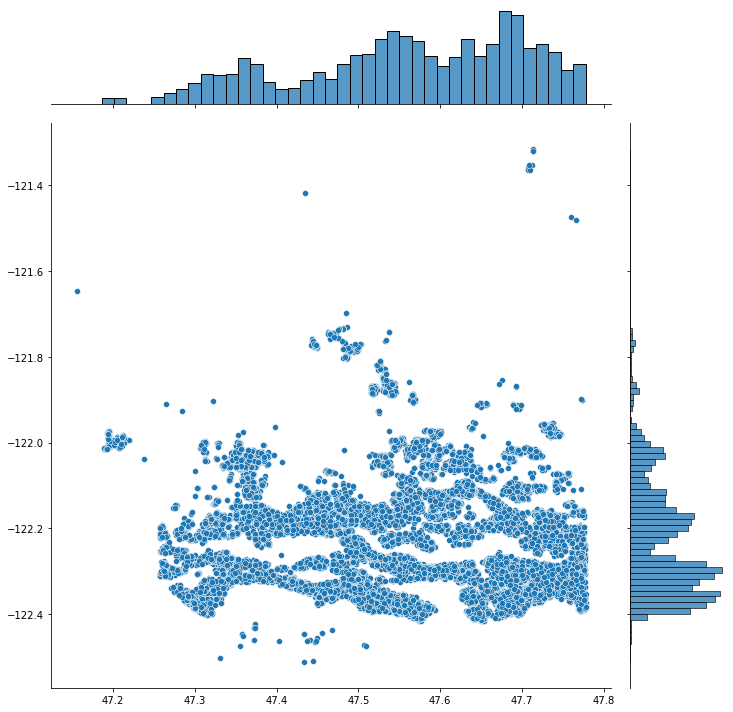

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [110]:
plt.figure(figsize=(10,10))
sns.jointplot(x=hp.lat.values, y=hp.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

We can see that for latitude between -47.5 and -47.8 and for longitude between -122.0 to -122.4 there are many houses.

# INSIGHTS

## So, from the data analysis we can see that data is somewhat unbalanced so we have to balance that also we can see that houses with basement have higher prices but those houses are very low in number so we should build house with basement in them also the sights have not been seen so much we can have an advertisement ready for that matter as much people can get aware that house is on sale and also we have seen that quality of most of the houses are graded are at 3 so we can work on the quality of the houses so that we house can also be sold easily and also the prices can be increased. We can also see that people are more interested in buying houses with more bedrooms so we should build houses with more bedrooms and also bathrooms people also like to buy houses with more bathrooms and we can see that people are tend to buy house which have 2 floors in it so we should mainly concentrate on building 2 floor houses. There are not many houses furnished so we should pay attention as people are more likely to buy furnished houses now days. As for other variables I would like to suggest we can apply a strategy to inform people about the things they are not aware off because right now people don’t pay attention on their houses we have to make them aware and guide so that we can also get business out of them we can also create a app and can make people aware about it so that we can get more data and information about their way of living and also their behavior according to which we can take action and also make business out of it.


In [111]:
hp.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
4886  2014-05-22  295000         4          2             980        10640   
9357  2014-05-15  217450         3          1            1040         5000   
1635  2014-05-28  599000         4          3            2020         2750   
17531 2014-05-27  399950         3          3            1296         1051   
17530 2014-05-08  595000         3          2            1750         3354   

       ceil  coast  sight  condition  quality  ceil_measure  basement  \
4886      1      0      0          5        7           980         0   
9357      1      0      0          3        7          1040         0   
1635      1      0      0          3        8          1010      1010   
17531     3      0      0          3        8          1296         0   
17530     2      0      0          4        7          1750         0   

       yr_built  yr_renovated  living_measure15  lot_measure15  furnished  \
4886       1978             0              1230           9750          0   
9357       1959             0              1440           5000          0   
1635       1917          2014              1840           4000          0   
17531      2009             0              1520           1939          0   
17530      1991             0              1750           4286          0   

       total_area      lat     long  zipcode month/year has_basement  \
4886        11620  47.4462 -121.773    98045   May/2014           No   
9357         6040  47.5122 -122.358    98146   May/2014           No   
1635         4770  47.6053 -122.291    98122   May/2014          Yes   
17531        2347  47.7175 -122.284    98125   May/2014           No   
17530        5104  47.6953 -122.199    98033   May/2014           No   

       house_land_ratio has_renovated  
4886                8.0            No  
9357               17.0            No  
1635               42.0           Yes  
17531              55.0            No  
17530              34.0            No

In [112]:
hp.drop(["dayhours","lat","long","zipcode","month/year","yr_built","yr_renovated"], axis=1,inplace=True)

In [113]:
dff = pd.get_dummies(hp, columns=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished', 
                                        'has_basement', 'has_renovated'],drop_first=True)

In [114]:
dff.head()

price  living_measure  lot_measure  ceil_measure  basement  \
4886   295000             980        10640           980         0   
9357   217450            1040         5000          1040         0   
1635   599000            2020         2750          1010      1010   
17531  399950            1296         1051          1296         0   
17530  595000            1750         3354          1750         0   

       living_measure15  lot_measure15  total_area  house_land_ratio  \
4886               1230           9750       11620               8.0   
9357               1440           5000        6040              17.0   
1635               1840           4000        4770              42.0   
17531              1520           1939        2347              55.0   
17530              1750           4286        5104              34.0   

       room_bed_1  room_bed_2  room_bed_3  room_bed_4  room_bed_5  room_bed_6  \
4886            0           0           0           1           0           0   
9357            0           0           1           0           0           0   
1635            0           0           0           1           0           0   
17531           0           0           1           0           0           0   
17530           0           0           1           0           0           0   

       room_bed_7  room_bed_8  room_bed_9  room_bed_10  room_bed_11  \
4886            0           0           0            0            0   
9357            0           0           0            0            0   
1635            0           0           0            0            0   
17531           0           0           0            0            0   
17530           0           0           0            0            0   

       room_bath_1  room_bath_2  room_bath_3  room_bath_4  room_bath_5  \
4886             0            1            0            0            0   
9357             1            0            0            0            0   
1635             0            0            1            0            0   
17531            0            0            1            0            0   
17530            0            1            0            0            0   

       room_bath_6  ceil_2  ceil_3  coast_1  sight_1  sight_2  sight_3  \
4886             0       0       0        0        0        0        0   
9357             0       0       0        0        0        0        0   
1635             0       0       0        0        0        0        0   
17531            0       0       1        0        0        0        0   
17530            0       1       0        0        0        0        0   

       sight_4  condition_2  condition_3  condition_4  condition_5  quality_4  \
4886         0            0            0            0            1          0   
9357         0            0            1            0            0          0   
1635         0            0            1            0            0          0   
17531        0            0            1            0            0          0   
17530        0            0            0            1            0          0   

       quality_5  quality_6  quality_7  quality_8  quality_9  quality_10  \
4886           0          0          1          0          0           0   
9357           0          0          1          0          0           0   
1635           0          0          0          1          0           0   
17531          0          0          0          1          0           0   
17530          0          0          1          0          0           0   

       quality_11  quality_12  furnished_1  has_basement_Yes  \
4886            0           0            0                 0   
9357            0           0            0                 0   
1635            0           0            0                 1   
17531           0           0            0                 0   
17530           0           0            0                 0   

       has_renovated_

In [115]:
dff.shape

(18289, 49)

In [116]:
dff.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'total_area', 'house_land_ratio',
       'room_bed_1', 'room_bed_2', 'room_bed_3', 'room_bed_4', 'room_bed_5',
       'room_bed_6', 'room_bed_7', 'room_bed_8', 'room_bed_9', 'room_bed_10',
       'room_bed_11', 'room_bath_1', 'room_bath_2', 'room_bath_3',
       'room_bath_4', 'room_bath_5', 'room_bath_6', 'ceil_2', 'ceil_3',
       'coast_1', 'sight_1', 'sight_2', 'sight_3', 'sight_4', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'quality_4', 'quality_5',
       'quality_6', 'quality_7', 'quality_8', 'quality_9', 'quality_10',
       'quality_11', 'quality_12', 'furnished_1', 'has_basement_Yes',
       'has_renovated_Yes'],
      dtype='object')

# Hierarchical clustering 

In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings("ignore")

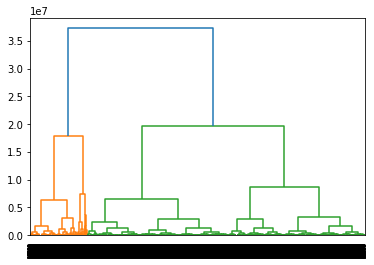

In [118]:
HClust = linkage(dff,method = 'ward')
dend = dendrogram(HClust)

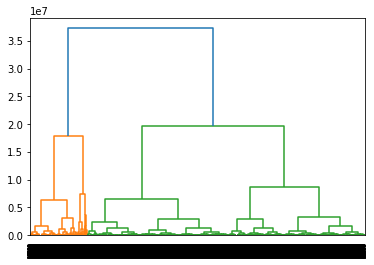

In [119]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 0.5,
                 )

In [120]:
cluster = fcluster(HClust, 3, criterion='maxclust')
cluster

array([2, 2, 3, ..., 3, 1, 3], dtype=int32)

In [121]:
dff['H_Clusters'] = cluster
dff.head(10)

price  living_measure  lot_measure  ceil_measure  basement  \
4886    295000             980        10640           980         0   
9357    217450            1040         5000          1040         0   
1635    599000            2020         2750          1010      1010   
17531   399950            1296         1051          1296         0   
17530   595000            1750         3354          1750         0   
18292   302000            2180         7813          2180         0   
19267   192500             950         7692           950         0   
9356    243000            1770         5522           960       810   
16580   615000            2300        11700          1960       340   
1620   1400000            2980         7000          2140       840   

       living_measure15  lot_measure15  total_area  house_land_ratio  \
4886               1230           9750       11620               8.0   
9357               1440           5000        6040              17.0   
1635               1840           4000        4770              42.0   
17531              1520           1939        2347              55.0   
17530              1750           4286        5104              34.0   
18292              1880           8649        9993              22.0   
19267              1820           8221        8642              11.0   
9356               1830           7378        7292              24.0   
16580              2840          12000       14000              16.0   
1620               2200           4800        9980              30.0   

       room_bed_1  room_bed_2  room_bed_3  room_bed_4  room_bed_5  room_bed_6  \
4886            0           0           0           1           0           0   
9357            0           0           1           0           0           0   
1635            0           0           0           1           0           0   
17531           0           0           1           0           0           0   
17530           0           0           1           0           0           0   
18292           0           0           0           0           1           0   
19267           0           1           0           0           0           0   
9356            0           1           0           0           0           0   
16580           0           0           0           1           0           0   
1620            0           0           0           1           0           0   

       room_bed_7  room_bed_8  room_bed_9  room_bed_10  room_bed_11  \
4886            0           0           0            0            0   
9357            0           0           0            0            0   
1635            0           0           0            0            0   
17531           0           0           0            0            0   
17530           0           0           0            0            0   
18292           0           0           0            0            0   
19267           0           0           0            0            0   
9356            0           0           0            0            0   
16580           0           0           0            0            0   
1620            0           0           0            0            0   

       room_bath_1  room_bath_2  room_bath_3  room_bath_4  room_bath_5  \
4886             0            1            0            0            0   
9357             1            0            0            0            0   
1635             0            0            1            0            0   
17531            0            0            1            0            0   
17530            0            1            0            0            0   
18292            0            1            0            0            0   
19267            1            0            0            0            0   
9356             1            0            0            0            0   
16580            0            1            0            0            0   
1620             0  

In [122]:
dff['H_Clusters'].value_counts().sort_index()

1    3108
2    7718
3    7463
Name: H_Clusters, dtype: int64

In [123]:
aggdata1=dff.groupby('H_Clusters').mean()
aggdata1

price  living_measure  lot_measure  ceil_measure  \
H_Clusters                                                             
1           917176.802445     2659.384170  7550.832368   2259.844916   
2           286988.579166     1560.339077  7482.263799   1394.186447   
3           512366.738979     1934.190540  6645.909822   1645.874581   

              basement  living_measure15  lot_measure15    total_area  \
H_Clusters                                                              
1           399.833655       2432.795689    7495.251287  10214.236808   
2           166.026950       1615.950635    7565.578259   9046.197331   
3           288.145786       1888.342490    6682.221359   8579.213721   

            house_land_ratio  room_bed_1  room_bed_2  room_bed_3  room_bed_4  \
H_Clusters                                                                     
1                  28.746139    0.000644    0.052445    0.326255    0.480051   
2                  19.845038    0.016714    0.174268    0.538611    0.225317   
3                  26.203537    0.005226    0.141766    0.470052    0.309393   

            room_bed_5  room_bed_6  room_bed_7  room_bed_8  room_bed_9  \
H_Clusters                                                               
1             0.116795    0.019305    0.002574    0.000644    0.000965   
2             0.036668    0.006478    0.000518    0.000259    0.000000   
3             0.062039    0.009246    0.001340    0.000402    0.000134   

            room_bed_10  room_bed_11  room_bath_1  room_bath_2  room_bath_3  \
H_Clusters                                                                    
1              0.000000     0.000000     0.042793     0.600386     0.234556   
2              0.000000     0.000000     0.313682     0.632936     0.046774   
3              0.000268     0.000134     0.146456     0.719148     0.107865   

            room_bath_4  room_bath_5  room_bath_6    ceil_2    ceil_3  \
H_Clusters                                                              
1              0.120978     0.000965     0.000000  0.575933  0.031210   
2              0.005312     0.000259     0.000000  0.276626  0.019306   
3              0.025861     0.000536     0.000134  0.379740  0.046228   

             coast_1   sight_1   sight_2   sight_3   sight_4  condition_2  \
H_Clusters                                                                  
1           0.015122  0.037645  0.094273  0.053732  0.039897     0.001287   
2           0.000518  0.005701  0.013605  0.004017  0.000648     0.013086   
3           0.001474  0.014069  0.038992  0.012997  0.002680     0.003886   

            condition_3  condition_4  condition_5  quality_4  quality_5  \
H_Clusters                                                                
1              0.625161     0.249035     0.124517   0.000000   0.000965   
2              0.648095     0.273128     0.063877   0.002591   0.023193   
3              0.665684     0.250971     0.078521   0.000134   0.001876   

            quality_6  quality_7  quality_8  quality_9  quality_10  \
H_Clusters                                                           
1            0.006435   0.145753   0.318533   0.350708    0.152510   
2            0.192019   0.583053   0.182819   0.015807    0.000389   
3            0.049176   0.451829   0.385234   0.099424    0.012193   

            quality_11  quality_12  furnished_1  has_basement_Yes  \
H_Clusters                                                          
1             0.024453    0.000644     0.527992          0.504826   
2             0.000000    0.000000     0.016196          0.277792   
3             0.000134    0.000000     0.111617          0.449819   

            has_renovated_Yes  
H_Clusters                     
1                    0.093308  
2                    0.022674  
3                    0.033499

Here, we can clearly see that hierarchical cluster method shows us 3 group of cluster's. The 1st Group belong's to the highest price range group the 3rd one belongs to the middle price range group & 2nd belongs to the lowest price range group. The group 1 posses 3108 propertise,group 2 with 7718 propertise & group 3 with 7463 propertise. As per this we can come to a decision that most of the propertise falls in lowest price group then the middle one followed by highest price group.  

# KMeans Clustering

In [124]:
wss =[] 

In [125]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(dff)
    wss.append(KM.inertia_);

In [126]:
wss

[1198887034239323.5,
 487324962062476.8,
 252932523920963.9,
 147941927419060.38,
 104647397801474.62,
 75275985870287.16,
 56155296306426.984,
 43783146902911.43,
 35927464353459.33,
 29179153028474.848]

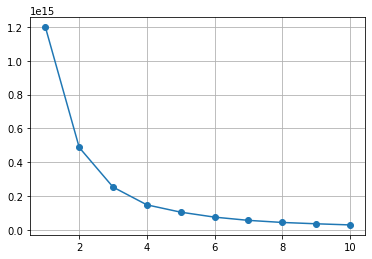

In [127]:
plt.plot(range(1,11), wss, marker = 'o')
plt.grid()
plt.show()

In [128]:
k_means = KMeans(n_clusters = 3)
k_means.fit(dff)
labels = k_means.labels_

In [129]:
dff["KMeans_Clus"] = labels
dff.head(10)

price  living_measure  lot_measure  ceil_measure  basement  \
4886    295000             980        10640           980         0   
9357    217450            1040         5000          1040         0   
1635    599000            2020         2750          1010      1010   
17531   399950            1296         1051          1296         0   
17530   595000            1750         3354          1750         0   
18292   302000            2180         7813          2180         0   
19267   192500             950         7692           950         0   
9356    243000            1770         5522           960       810   
16580   615000            2300        11700          1960       340   
1620   1400000            2980         7000          2140       840   

       living_measure15  lot_measure15  total_area  house_land_ratio  \
4886               1230           9750       11620               8.0   
9357               1440           5000        6040              17.0   
1635               1840           4000        4770              42.0   
17531              1520           1939        2347              55.0   
17530              1750           4286        5104              34.0   
18292              1880           8649        9993              22.0   
19267              1820           8221        8642              11.0   
9356               1830           7378        7292              24.0   
16580              2840          12000       14000              16.0   
1620               2200           4800        9980              30.0   

       room_bed_1  room_bed_2  room_bed_3  room_bed_4  room_bed_5  room_bed_6  \
4886            0           0           0           1           0           0   
9357            0           0           1           0           0           0   
1635            0           0           0           1           0           0   
17531           0           0           1           0           0           0   
17530           0           0           1           0           0           0   
18292           0           0           0           0           1           0   
19267           0           1           0           0           0           0   
9356            0           1           0           0           0           0   
16580           0           0           0           1           0           0   
1620            0           0           0           1           0           0   

       room_bed_7  room_bed_8  room_bed_9  room_bed_10  room_bed_11  \
4886            0           0           0            0            0   
9357            0           0           0            0            0   
1635            0           0           0            0            0   
17531           0           0           0            0            0   
17530           0           0           0            0            0   
18292           0           0           0            0            0   
19267           0           0           0            0            0   
9356            0           0           0            0            0   
16580           0           0           0            0            0   
1620            0           0           0            0            0   

       room_bath_1  room_bath_2  room_bath_3  room_bath_4  room_bath_5  \
4886             0            1            0            0            0   
9357             1            0            0            0            0   
1635             0            0            1            0            0   
17531            0            0            1            0            0   
17530            0            1            0            0            0   
18292            0            1            0            0            0   
19267            1            0            0            0            0   
9356             1            0            0            0            0   
16580            0            1            0            0            0   
1620             0  

In [130]:
dff['KMeans_Clus'].value_counts().sort_index()

0     6268
1    11275
2      746
Name: KMeans_Clus, dtype: int64

In [131]:
aggdata2=dff.groupby('KMeans_Clus').mean()
aggdata2

price  living_measure  lot_measure  ceil_measure  \
KMeans_Clus                                                            
0            6.601877e+05     2251.608966  6917.754308   1916.193523   
1            3.351264e+05     1632.379069  7225.096497   1439.219690   
2            1.303954e+06     2982.262735  8030.934316   2451.994638   

               basement  living_measure15  lot_measure15    total_area  \
KMeans_Clus                                                              
0            335.484046       2132.674059    6905.249362   9168.482451   
1            193.003725       1667.743503    7291.222350   8859.542971   
2            530.268097       2619.741287    8130.237265  11034.418231   

             house_land_ratio  room_bed_1  room_bed_2  room_bed_3  room_bed_4  \
KMeans_Clus                                                                     
0                   27.653797    0.002553    0.091895    0.406669    0.396937   
1                   21.483636    0.013570    0.174102    0.523636    0.238670   
2                   30.163539    0.001340    0.036193    0.302949    0.483914   

             room_bed_5  room_bed_6  room_bed_7  room_bed_8  room_bed_9  \
KMeans_Clus                                                               
0              0.083918    0.014199    0.002234    0.000638    0.000479   
1              0.041774    0.006563    0.000621    0.000266    0.000000   
2              0.150134    0.021448    0.001340    0.000000    0.001340   

             room_bed_10  room_bed_11  room_bath_1  room_bath_2  room_bath_3  \
KMeans_Clus                                                                    
0               0.000319      0.00016     0.089343     0.692087     0.163050   
1               0.000000      0.00000     0.272727     0.659246     0.058093   
2               0.000000      0.00000     0.016086     0.465147     0.292225   

             room_bath_4  room_bath_5  room_bath_6    ceil_2    ceil_3  \
KMeans_Clus                                                              
0               0.055041     0.000319      0.00016  0.459158  0.039087   
1               0.008869     0.000355      0.00000  0.300665  0.027672   
2               0.221180     0.004021      0.00000  0.658177  0.045576   

              coast_1   sight_1   sight_2   sight_3   sight_4  condition_2  \
KMeans_Clus                                                                  
0            0.003510  0.024888  0.062540  0.024888  0.010370     0.002234   
1            0.000443  0.006829  0.017916  0.005055  0.000887     0.010554   
2            0.046917  0.044236  0.127346  0.109920  0.099196     0.001340   

             condition_3  condition_4  condition_5  quality_4  quality_5  \
KMeans_Clus                                                                
0               0.646618     0.250957     0.099713   0.000000   0.001117   
1               0.658271     0.265455     0.064124   0.001863   0.016763   
2               0.587131     0.253351     0.158177   0.000000   0.000000   

             quality_6  quality_7  quality_8  quality_9  quality_10  \
KMeans_Clus                                                           
0             0.017390   0.304722   0.406190   0.210593    0.055041   
1             0.155743   0.567007   0.227583   0.029091    0.001774   
2             0.005362   0.029491   0.219839   0.410188    0.272118   

             quality_11  quality_12  furnished_1  has_basement_Yes  \
KMeans_Clus                                                          
0              0.004946    0.000000     0.270262          0.473516   
1              0.000089    0.000000     0.030953          0.321596   
2              0.060322    0.002681     0.745308          0.638070   

             has_renovated_Yes  H_Clusters  
KMeans_Clus                                 
0                     0.050574    2.246331  
1                     0.025277    2.315477  
2                     0.151475    1.000000

Here, we can see that 3 groups are formed first is group 0 with 6268 propertise then group 1 with 11275 propertise followed by group 2 with 746 propertise from this we can see that most of the propertise falls in group 1 followed by group 0 & group 2. Group 1 have a price range which comes in between group 0 & 2 whereas group 0 have maximum price range & group 2 have the lowest price range.So, it will be good to invest in those properties which falls in group 1.

In [132]:
dff.head()

price  living_measure  lot_measure  ceil_measure  basement  \
4886   295000             980        10640           980         0   
9357   217450            1040         5000          1040         0   
1635   599000            2020         2750          1010      1010   
17531  399950            1296         1051          1296         0   
17530  595000            1750         3354          1750         0   

       living_measure15  lot_measure15  total_area  house_land_ratio  \
4886               1230           9750       11620               8.0   
9357               1440           5000        6040              17.0   
1635               1840           4000        4770              42.0   
17531              1520           1939        2347              55.0   
17530              1750           4286        5104              34.0   

       room_bed_1  room_bed_2  room_bed_3  room_bed_4  room_bed_5  room_bed_6  \
4886            0           0           0           1           0           0   
9357            0           0           1           0           0           0   
1635            0           0           0           1           0           0   
17531           0           0           1           0           0           0   
17530           0           0           1           0           0           0   

       room_bed_7  room_bed_8  room_bed_9  room_bed_10  room_bed_11  \
4886            0           0           0            0            0   
9357            0           0           0            0            0   
1635            0           0           0            0            0   
17531           0           0           0            0            0   
17530           0           0           0            0            0   

       room_bath_1  room_bath_2  room_bath_3  room_bath_4  room_bath_5  \
4886             0            1            0            0            0   
9357             1            0            0            0            0   
1635             0            0            1            0            0   
17531            0            0            1            0            0   
17530            0            1            0            0            0   

       room_bath_6  ceil_2  ceil_3  coast_1  sight_1  sight_2  sight_3  \
4886             0       0       0        0        0        0        0   
9357             0       0       0        0        0        0        0   
1635             0       0       0        0        0        0        0   
17531            0       0       1        0        0        0        0   
17530            0       1       0        0        0        0        0   

       sight_4  condition_2  condition_3  condition_4  condition_5  quality_4  \
4886         0            0            0            0            1          0   
9357         0            0            1            0            0          0   
1635         0            0            1            0            0          0   
17531        0            0            1            0            0          0   
17530        0            0            0            1            0          0   

       quality_5  quality_6  quality_7  quality_8  quality_9  quality_10  \
4886           0          0          1          0          0           0   
9357           0          0          1          0          0           0   
1635           0          0          0          1          0           0   
17531          0          0          0          1          0           0   
17530          0          0          1          0          0           0   

       quality_11  quality_12  furnished_1  has_basement_Yes  \
4886            0           0            0                 0   
9357            0           0            0                 0   
1635            0           0            0                 1   
17531           0           0            0                 0   
17530           0           0            0                 0   

       has_renovated_

In [133]:
dff.drop(['H_Clusters',"KMeans_Clus"], axis=1,inplace=True)

# Dividing Data into Train - Test Split

In [134]:
#Creating X, y for training and testing set
X = dff.drop("price" , axis=1)
y = dff["price"]

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [136]:
from IPython.display import display

In [137]:
display(X_train.head())

print(X_train.shape)

living_measure  lot_measure  ceil_measure  basement  living_measure15  \
1893             1310          915          1060       250              1500   
6249             3910         8442          2710      1200              2650   
18796            2940         4799          1710      1230              2540   
6852             1780         9732          1780         0              1900   
15215            2303         3680          2303         0              2303   

       lot_measure15  total_area  house_land_ratio  room_bed_1  room_bed_2  \
1893            1215        2225              59.0           0           0   
6249            7576       12352              32.0           0           0   
18796           4616        7739              38.0           0           0   
6852           10200       11512              15.0           0           0   
15215           3760        5983              38.0           0           0   

       room_bed_3  room_bed_4  room_bed_5  room_bed_6  room_bed_7  room_bed_8  \
1893            1           0           0           0           0           0   
6249            0           1           0           0           0           0   
18796           1           0           0           0           0           0   
6852            1           0           0           0           0           0   
15215           0           1           0           0           0           0   

       room_bed_9  room_bed_10  room_bed_11  room_bath_1  room_bath_2  \
1893            0            0            0            0            1   
6249            0            0            0            0            1   
18796           0            0            0            0            1   
6852            0            0            0            0            1   
15215           0            0            0            0            1   

       room_bath_3  room_bath_4  room_bath_5  room_bath_6  ceil_2  ceil_3  \
1893             0            0            0            0       1       0   
6249             0            0            0            0       1       0   
18796            0            0            0            0       0       0   
6852             0            0            0            0       0       0   
15215            0            0            0            0       1       0   

       coast_1  sight_1  sight_2  sight_3  sight_4  condition_2  condition_3  \
1893         0        0        0        0        0            0            1   
6249         0        0        0        0        0            0            1   
18796        0        0        0        0        0            0            1   
6852         0        0        0        0        0            0            1   
15215        0        0        0        0        0            0            1   

       condition_4  condition_5  quality_4  quality_5  quality_6  quality_7  \
1893             0            0          0          0          0          1   
6249             0            0          0          0          0          0   
18796            0            0          0          0          0          0   
6852             0            0          0          0          0          0   
15215            0            0          0          0          0          0   

       quality_8  quality_9  quality_10  quality_11  quality_12  furnished_1  \
1893           0          0           0           0           0            0   
6249           0          1           0           0           0            1   
18796          0          1           0           0           0            1   
6852           1          0           0           0           0            0   
15215          1          0           0           0           0            0   

       has_basement_Yes  has_renovated_Yes  
1893                  1                  0  
6249                  1                  0  
18796                 1                  0  
6852                  0                  0  
15215 

(12802, 48)


In [138]:
display(y_test.head())

print(y_test.shape)

3221     610000
12881    325000
18286    440000
8192     245000
13856    330675
Name: price, dtype: int32

(5487,)


In [139]:
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from scipy import stats

# Checking P-Values & Co-efficients of the variables

In [140]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     368.1
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:01:47   Log-Likelihood:            -1.7222e+05
No. Observations:               12802   AIC:                         3.445e+05
Df Residuals:                   12754   BIC:                         3.449e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.487e+05   1.06e+0

Here, we can look at the co-efficients we can interpret values based on if its positive and negative. whichever variables co-efficient is positive meaning for eg every increase in value of living_measure there is price increase we can apply the same logic in every variable which is positive and whichever variable co-efficient is negative for eg if there are negative co-efficients variable is tend to lose the price or can say there is decrease in price according to the value that the variable has.For, P - Values we can say whichever variable has a higher value then 0.05 that is insignificant for us and the variables which are under or equal to 0.05 are significant values can say important variables for prediction on our data.    

# Models

# LDA

In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [142]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)

0.10990470239025152


In [143]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)

0.00291598323309641


In [144]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [145]:
LDA_trscore=r2_score(y_train,ytrain_predict)
LDA_trRMSE=np.sqrt(mean_squared_error(y_train, ytrain_predict))
LDA_trMSE=mean_squared_error(y_train, ytrain_predict)
LDA_trMAE=mean_absolute_error(y_train, ytrain_predict)

LDA_df_Train=pd.DataFrame({'Method':['LDA_model_Train'],'Train':LDA_trscore,'RMSE': LDA_trRMSE, 'MSE':LDA_trMSE, 'MAE': LDA_trMAE})
LDA_df_Train

Method     Train         RMSE           MSE            MAE
0  LDA_model_Train  0.998662  9449.488652  8.929284e+07  138367.520856

In [146]:
LDA_trscore=r2_score(y_test,ytest_predict)
LDA_trRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
LDA_trMSE=mean_squared_error(y_test,ytest_predict)
LDA_trMAE=mean_absolute_error(y_test,ytest_predict)

LDA_df_Test=pd.DataFrame({'Method':['LDA_model_Test'],'Test':LDA_trscore,'RMSE': LDA_trRMSE, 'MSE':LDA_trMSE, 'MAE': LDA_trMAE})
LDA_df_Test

Method      Test          RMSE           MSE            MAE
0  LDA_model_Test  0.998278  10383.348332  1.078139e+08  154302.666484

# Linear Regression

In [147]:
LR1 = LinearRegression()
LR1.fit(X_train, y_train)
#predicting result over test data
y_LR1_predtr= LR1.predict(X_train)
y_LR1_predvl= LR1.predict(X_test)

In [148]:
LR1_trscore=r2_score(y_train,y_LR1_predtr)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
LR1_trMSE=mean_squared_error(y_train, y_LR1_predtr)
LR1_trMAE=mean_absolute_error(y_train, y_LR1_predtr)

LR_df_Tr=pd.DataFrame({'Method':['LinearReg_Model_Train'],'Train':LR1_trscore,'RMSE': LR1_trRMSE, 'MSE': LR1_trMSE, 'MAE': LR1_trMAE})
LR_df_Train = pd.concat([LR_df_Tr,LDA_df_Train])
LR_df_Train

Method     Train           RMSE           MSE            MAE
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856

In [149]:
LR_trscore=r2_score(y_test,y_LR1_predvl)
LR_trRMSE=np.sqrt(mean_squared_error(y_test,y_LR1_predvl))
LR_trMSE=mean_squared_error(y_test,y_LR1_predvl)
LR_trMAE=mean_absolute_error(y_test,y_LR1_predvl)

LR_df_Te=pd.DataFrame({'Method':['LinearReg_Model_Test'],'Test':LR_trscore,'RMSE': LR_trRMSE, 'MSE': LR_trMSE, 'MAE': LR_trMAE})
LR_df_Test = pd.concat([LR_df_Te,LDA_df_Test])
LR_df_Test

Method      Test           RMSE           MSE            MAE
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484

# Logistic Regression 

In [150]:
from sklearn.linear_model import LogisticRegression
LO = LogisticRegression()
LO.fit(X_train, y_train)

y_Lo_predtr= LO.predict(X_train)
y_Lo_predvl= LO.predict(X_test)

In [151]:
LO_trscore=r2_score(y_train,y_Lo_predtr)
LO_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lo_predtr))
LO_trMSE=mean_squared_error(y_train, y_Lo_predtr)
LO_trMAE=mean_absolute_error(y_train, y_Lo_predtr)

LO_df_Tr=pd.DataFrame({'Method':['LogisticReg_Train'],'Train':LO_trscore,'RMSE': LO_trRMSE, 'MSE': LO_trMSE, 'MAE': LO_trMAE})
LO_df_Train = pd.concat([LO_df_Tr,LR_df_Train])
LO_df_Train

Method     Train           RMSE           MSE            MAE
0      LogisticReg_Train  0.998886    8624.409894  7.438045e+07  217180.534995
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856

In [152]:
LO_trscore=r2_score(y_test,y_Lo_predvl)
LO_trRMSE=np.sqrt(mean_squared_error(y_test,y_Lo_predvl))
LO_trMSE=mean_squared_error(y_test,y_Lo_predvl)
LO_trMAE=mean_absolute_error(y_test,y_Lo_predvl)

LO_df_Te=pd.DataFrame({'Method':['LogisticReg_Test'],'Test':LO_trscore,'RMSE': LO_trRMSE, 'MSE': LO_trMSE, 'MAE': LO_trMAE})
LO_df_Test = pd.concat([LO_df_Te,LR_df_Test])
LO_df_Test

Method      Test           RMSE           MSE            MAE
0      LogisticReg_Test  0.999130    7379.569804  5.445805e+07  214311.377438
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484

# KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn1 = KNeighborsClassifier(n_neighbors=4,weights='distance')
knn1.fit(X_train, y_train)

#predicting result over test data
y_knn1_predtr= knn1.predict(X_train)
y_knn1_predvl= knn1.predict(X_test)

In [155]:
knn1_trscore=r2_score(y_train,y_knn1_predtr)
knn1_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_trMSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_trMAE=mean_absolute_error(y_train, y_knn1_predtr)

knn1_df=pd.DataFrame({'Method':['KNN_Train'],'Train':knn1_trscore,'RMSE': knn1_trRMSE, 'MSE': knn1_trMSE, 'MAE': knn1_trMAE})
KNN_Train = pd.concat([knn1_df,LO_df_Train])
KNN_Train

Method     Train           RMSE           MSE            MAE
0              KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0      LogisticReg_Train  0.998886    8624.409894  7.438045e+07  217180.534995
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856

In [156]:
knn2_trscore=r2_score(y_test,y_knn1_predvl)
knn2_trRMSE=np.sqrt(mean_squared_error(y_test,y_knn1_predvl))
knn2_trMSE=mean_squared_error(y_test,y_knn1_predvl)
knn2_trMAE=mean_absolute_error(y_test,y_knn1_predvl)

knn2_df=pd.DataFrame({'Method':['KNN_Test'],'Test':knn2_trscore,'RMSE': knn2_trRMSE, 'MSE': knn2_trMSE, 'MAE': knn2_trMAE})
KNN_Test = pd.concat([knn2_df,LO_df_Test])
KNN_Test

Method      Test           RMSE           MSE            MAE
0              KNN_Test  0.998556    9509.663910  9.043371e+07  168178.955349
0      LogisticReg_Test  0.999130    7379.569804  5.445805e+07  214311.377438
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484

# Naive Bayes

In [157]:
from sklearn.naive_bayes import GaussianNB

In [158]:
NB1 = GaussianNB()
NB1.fit(X_train, y_train)

y_NB1_predtr= NB1.predict(X_train)
y_NB1_predvl= NB1.predict(X_test)

In [159]:
NB1_trscore=r2_score(y_train,y_NB1_predtr)
NB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_NB1_predtr))
NB1_trMSE=mean_squared_error(y_train, y_NB1_predtr)
NB1_trMAE=mean_absolute_error(y_train, y_NB1_predtr)

NB1_df=pd.DataFrame({'Method':['NB_Train'],'Train':NB1_trscore,'RMSE': NB1_trRMSE, 'MSE': NB1_trMSE, 'MAE': NB1_trMAE})
NB_Train = pd.concat([NB1_df,KNN_Train])
NB_Train

Method     Train           RMSE           MSE            MAE
0               NB_Train  0.999086    7811.557350  6.102043e+07  137477.887049
0              KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0      LogisticReg_Train  0.998886    8624.409894  7.438045e+07  217180.534995
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856

In [160]:
NB2_trscore=r2_score(y_test,y_NB1_predvl)
NB2_trRMSE=np.sqrt(mean_squared_error(y_test,y_NB1_predvl))
NB2_trMSE=mean_squared_error(y_test,y_NB1_predvl)
NB2_trMAE=mean_absolute_error(y_test,y_NB1_predvl)

NB2_df=pd.DataFrame({'Method':['NB_Test'],'Test':NB2_trscore,'RMSE': NB2_trRMSE, 'MSE': NB2_trMSE, 'MAE': NB2_trMAE})
NB_Test = pd.concat([NB2_df,KNN_Test])
NB_Test

Method      Test           RMSE           MSE            MAE
0               NB_Test  0.998267   10417.914480  1.085329e+08  165337.612903
0              KNN_Test  0.998556    9509.663910  9.043371e+07  168178.955349
0      LogisticReg_Test  0.999130    7379.569804  5.445805e+07  214311.377438
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484

# SVM

In [161]:
from sklearn import svm

SVM_model= svm.SVC()
SVM_model.fit(X_train, y_train)

SVC()

In [162]:
y_SVR1_predtr= SVM_model.predict(X_train)
y_SVR1_predvl= SVM_model.predict(X_test)

In [163]:
SVR1_trscore=r2_score(y_train,y_SVR1_predtr)
SVR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_SVR1_predtr))
SVR1_trMSE=mean_squared_error(y_train, y_SVR1_predtr)
SVR1_trMAE=mean_absolute_error(y_train, y_SVR1_predtr)

SVR1_df=pd.DataFrame({'Method':['SVR_Train'],'Train':SVR1_trscore,'RMSE': SVR1_trRMSE, 'MSE': SVR1_trMSE, 'MAE': SVR1_trMAE})
SVR_Train = pd.concat([SVR1_df,NB_Train])
SVR_Train

Method     Train           RMSE           MSE            MAE
0              SVR_Train  0.998463   10129.164104  1.026000e+08  180137.556866
0               NB_Train  0.999086    7811.557350  6.102043e+07  137477.887049
0              KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0      LogisticReg_Train  0.998886    8624.409894  7.438045e+07  217180.534995
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856

In [164]:
SVR2_trscore=r2_score(y_test,y_SVR1_predvl)
SVR2_trRMSE=np.sqrt(mean_squared_error(y_test,y_SVR1_predvl))
SVR2_trMSE=mean_squared_error(y_test,y_SVR1_predvl)
SVR2_trMAE=mean_absolute_error(y_test,y_SVR1_predvl)

SVR2_df=pd.DataFrame({'Method':['SVR_Test'],'Test':SVR2_trscore,'RMSE': SVR2_trRMSE, 'MSE': SVR2_trMSE, 'MAE': SVR2_trMAE})
SVR_Test = pd.concat([SVR2_df,NB_Test])
SVR_Test

Method      Test           RMSE           MSE            MAE
0              SVR_Test  0.998643    9218.409793  8.497908e+07  178079.348278
0               NB_Test  0.998267   10417.914480  1.085329e+08  165337.612903
0              KNN_Test  0.998556    9509.663910  9.043371e+07  168178.955349
0      LogisticReg_Test  0.999130    7379.569804  5.445805e+07  214311.377438
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484

# Decision Tree Regressor

In [165]:
from sklearn.tree import DecisionTreeRegressor

In [166]:
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)

y_DT1_predtr= DT1.predict(X_train)
y_DT1_predvl= DT1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
DT1_trscore=r2_score(y_train,y_DT1_predtr)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_trMSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_trMAE=mean_absolute_error(y_train, y_DT1_predtr)

DT1_df=pd.DataFrame({'Method':['DT_Train'],'Train':DT1_trscore,'RMSE': DT1_trRMSE, 'MSE': DT1_trMSE, 'MAE': DT1_trMAE})
DT_Train = pd.concat([SVR_Train,DT1_df])
DT_Train

Method     Train           RMSE           MSE            MAE
0              SVR_Train  0.998463   10129.164104  1.026000e+08  180137.556866
0               NB_Train  0.999086    7811.557350  6.102043e+07  137477.887049
0              KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0      LogisticReg_Train  0.998886    8624.409894  7.438045e+07  217180.534995
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856
0               DT_Train  0.998478   10078.403407  1.015742e+08     972.428995

In [167]:
DT2_trscore=r2_score(y_test,y_DT1_predvl)
DT2_trRMSE=np.sqrt(mean_squared_error(y_test,y_DT1_predvl))
DT2_trMSE=mean_squared_error(y_test,y_DT1_predvl)
DT2_trMAE=mean_absolute_error(y_test,y_DT1_predvl)

DT2_df=pd.DataFrame({'Method':['DT_Test'],'Test':DT2_trscore,'RMSE': DT2_trRMSE, 'MSE': DT2_trMSE, 'MAE': DT2_trMAE})
DT2_Test = pd.concat([SVR_Test,DT2_df])
DT2_Test

Method      Test           RMSE           MSE            MAE
0              SVR_Test  0.998643    9218.409793  8.497908e+07  178079.348278
0               NB_Test  0.998267   10417.914480  1.085329e+08  165337.612903
0              KNN_Test  0.998556    9509.663910  9.043371e+07  168178.955349
0      LogisticReg_Test  0.999130    7379.569804  5.445805e+07  214311.377438
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484
0               DT_Test  0.286495  211367.694651  4.467630e+10  146157.440405

# Boosting & Bagging

In [168]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [169]:
GB1=GradientBoostingRegressor()
GB1.fit(X_train, y_train)

y_GB1_predtr= GB1.predict(X_train)
y_GB1_predvl= GB1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
GB1_trscore=r2_score(y_train,y_GB1_predtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
GB1_trMSE=mean_squared_error(y_train, y_GB1_predtr)
GB1_trMAE=mean_absolute_error(y_train, y_GB1_predtr)

GB1_df=pd.DataFrame({'Method':['GB_Train'],'Train':GB1_trscore,'RMSE': GB1_trRMSE, 'MSE': GB1_trMSE, 'MAE': GB1_trMAE})
GB_Train = pd.concat([DT_Train,GB1_df])
GB_Train

Method     Train           RMSE           MSE            MAE
0              SVR_Train  0.998463   10129.164104  1.026000e+08  180137.556866
0               NB_Train  0.999086    7811.557350  6.102043e+07  137477.887049
0              KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0      LogisticReg_Train  0.998886    8624.409894  7.438045e+07  217180.534995
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856
0               DT_Train  0.998478   10078.403407  1.015742e+08     972.428995
0               GB_Train  0.666810  149129.118645  2.223949e+10  109406.273650

In [170]:
GB2_trscore=r2_score(y_test,y_GB1_predvl)
GB2_trRMSE=np.sqrt(mean_squared_error(y_test,y_GB1_predvl))
GB2_trMSE=mean_squared_error(y_test,y_GB1_predvl)
GB2_trMAE=mean_absolute_error(y_test,y_GB1_predvl)

GB2_df=pd.DataFrame({'Method':['GB_Test'],'Test':GB2_trscore,'RMSE': GB2_trRMSE, 'MSE': GB2_trMSE, 'MAE': GB2_trMAE})
GB_Test = pd.concat([DT2_Test,GB2_df])
GB_Test

Method      Test           RMSE           MSE            MAE
0              SVR_Test  0.998643    9218.409793  8.497908e+07  178079.348278
0               NB_Test  0.998267   10417.914480  1.085329e+08  165337.612903
0              KNN_Test  0.998556    9509.663910  9.043371e+07  168178.955349
0      LogisticReg_Test  0.999130    7379.569804  5.445805e+07  214311.377438
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484
0               DT_Test  0.286495  211367.694651  4.467630e+10  146157.440405
0               GB_Test  0.620826  154084.640955  2.374208e+10  112120.464062

# Bagging

In [171]:
BGG1=BaggingRegressor()
BGG1.fit(X_train, y_train)

y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predvl= BGG1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
BGG1_trscore=r2_score(y_train,y_BGG1_predtr)
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGG1_predtr))
BGG1_trMSE=mean_squared_error(y_train, y_BGG1_predtr)
BGG1_trMAE=mean_absolute_error(y_train, y_BGG1_predtr)

BGG1_df=pd.DataFrame({'Method':['BGG_Train'],'Train':BGG1_trscore,'RMSE': BGG1_trRMSE, 'MSE': BGG1_trMSE, 'MAE': BGG1_trMAE})
BGG_Train = pd.concat([BGG1_df,GB_Train])
BGG_Train

Method     Train           RMSE           MSE            MAE
0              BGG_Train  0.926768   69914.609950  4.888053e+09   45614.958627
0              SVR_Train  0.998463   10129.164104  1.026000e+08  180137.556866
0               NB_Train  0.999086    7811.557350  6.102043e+07  137477.887049
0              KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0      LogisticReg_Train  0.998886    8624.409894  7.438045e+07  217180.534995
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856
0               DT_Train  0.998478   10078.403407  1.015742e+08     972.428995
0               GB_Train  0.666810  149129.118645  2.223949e+10  109406.273650

In [172]:
BGG2_trscore=r2_score(y_test,y_BGG1_predvl)
BGG2_trRMSE=np.sqrt(mean_squared_error(y_test,y_BGG1_predvl))
BGG2_trMSE=mean_squared_error(y_test,y_BGG1_predvl)
BGG2_trMAE=mean_absolute_error(y_test,y_BGG1_predvl)

BGG2_df=pd.DataFrame({'Method':['BGG_Test'],'Test':BGG2_trscore,'RMSE': BGG2_trRMSE, 'MSE': BGG2_trMSE, 'MAE': BGG2_trMAE})
BGG_Test = pd.concat([BGG2_df,GB_Test])
BGG_Test

Method      Test           RMSE           MSE            MAE
0              BGG_Test  0.601878  157887.574268  2.492849e+10  113066.151921
0              SVR_Test  0.998643    9218.409793  8.497908e+07  178079.348278
0               NB_Test  0.998267   10417.914480  1.085329e+08  165337.612903
0              KNN_Test  0.998556    9509.663910  9.043371e+07  168178.955349
0      LogisticReg_Test  0.999130    7379.569804  5.445805e+07  214311.377438
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484
0               DT_Test  0.286495  211367.694651  4.467630e+10  146157.440405
0               GB_Test  0.620826  154084.640955  2.374208e+10  112120.464062

# Random forest

In [173]:
from sklearn.ensemble import RandomForestRegressor
RF1=RandomForestRegressor()
RF1.fit(X_train, y_train)

y_RF1_predtr= RF1.predict(X_train)
y_RF1_predvl= RF1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
RF1_trscore=r2_score(y_train,y_RF1_predtr)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))
RF1_trMSE=mean_squared_error(y_train, y_RF1_predtr)
RF1_trMAE=mean_absolute_error(y_train, y_RF1_predtr)

RF1_df=pd.DataFrame({'Method':['RF_Train'],'Train':RF1_trscore,'RMSE': RF1_trRMSE, 'MSE': RF1_trMSE, 'MAE': RF1_trMAE})
RF_Train = pd.concat([RF1_df,BGG_Train])
RF_Train

Method     Train           RMSE           MSE            MAE
0               RF_Train  0.947336   59288.902603  3.515174e+09   41273.584222
0              BGG_Train  0.926768   69914.609950  4.888053e+09   45614.958627
0              SVR_Train  0.998463   10129.164104  1.026000e+08  180137.556866
0               NB_Train  0.999086    7811.557350  6.102043e+07  137477.887049
0              KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0      LogisticReg_Train  0.998886    8624.409894  7.438045e+07  217180.534995
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856
0               DT_Train  0.998478   10078.403407  1.015742e+08     972.428995
0               GB_Train  0.666810  149129.118645  2.223949e+10  109406.273650

In [174]:
RF2_trscore=r2_score(y_test,y_RF1_predvl)
RF2_trRMSE=np.sqrt(mean_squared_error(y_test,y_RF1_predvl))
RF2_trMSE=mean_squared_error(y_test,y_RF1_predvl)
RF2_trMAE=mean_absolute_error(y_test,y_RF1_predvl)

RF2_df=pd.DataFrame({'Method':['RF_Test'],'Test':RF2_trscore,'RMSE': RF2_trRMSE, 'MSE': RF2_trMSE, 'MAE': RF2_trMAE})
RF_Test = pd.concat([RF2_df,BGG_Test])
RF_Test

Method      Test           RMSE           MSE            MAE
0               RF_Test  0.635070  151162.750557  2.285018e+10  108565.916698
0              BGG_Test  0.601878  157887.574268  2.492849e+10  113066.151921
0              SVR_Test  0.998643    9218.409793  8.497908e+07  178079.348278
0               NB_Test  0.998267   10417.914480  1.085329e+08  165337.612903
0              KNN_Test  0.998556    9509.663910  9.043371e+07  168178.955349
0      LogisticReg_Test  0.999130    7379.569804  5.445805e+07  214311.377438
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484
0               DT_Test  0.286495  211367.694651  4.467630e+10  146157.440405
0               GB_Test  0.620826  154084.640955  2.374208e+10  112120.464062

In [175]:
Train_Result = RF_Train
Train_Result

Method     Train           RMSE           MSE            MAE
0               RF_Train  0.947336   59288.902603  3.515174e+09   41273.584222
0              BGG_Train  0.926768   69914.609950  4.888053e+09   45614.958627
0              SVR_Train  0.998463   10129.164104  1.026000e+08  180137.556866
0               NB_Train  0.999086    7811.557350  6.102043e+07  137477.887049
0              KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0      LogisticReg_Train  0.998886    8624.409894  7.438045e+07  217180.534995
0  LinearReg_Model_Train  0.575639  168300.179407  2.832495e+10  121310.244780
0        LDA_model_Train  0.998662    9449.488652  8.929284e+07  138367.520856
0               DT_Train  0.998478   10078.403407  1.015742e+08     972.428995
0               GB_Train  0.666810  149129.118645  2.223949e+10  109406.273650

In [176]:
Test_Result = RF_Test
Test_Result

Method      Test           RMSE           MSE            MAE
0               RF_Test  0.635070  151162.750557  2.285018e+10  108565.916698
0              BGG_Test  0.601878  157887.574268  2.492849e+10  113066.151921
0              SVR_Test  0.998643    9218.409793  8.497908e+07  178079.348278
0               NB_Test  0.998267   10417.914480  1.085329e+08  165337.612903
0              KNN_Test  0.998556    9509.663910  9.043371e+07  168178.955349
0      LogisticReg_Test  0.999130    7379.569804  5.445805e+07  214311.377438
0  LinearReg_Model_Test  0.560861  165821.547377  2.749679e+10  120719.887927
0        LDA_model_Test  0.998278   10383.348332  1.078139e+08  154302.666484
0               DT_Test  0.286495  211367.694651  4.467630e+10  146157.440405
0               GB_Test  0.620826  154084.640955  2.374208e+10  112120.464062

Here, we have 10 models in which we can see both RMSE value and Train and Test value either we can go with Train and Test values or we can go with RMSE values i prefer to go with Train and Test value so fo that reason the most suited model would be the RF Model because other models are either overfitted or have low value and if see from the perspective of RMSE value If the noise is small, as estimated by RMSE, this generally means our model is good at predicting our observed data, and if RMSE is large, this generally means our model is failing to account for important features underlying our data.So, These models will help us anlyse the most appropriate way to what direction we should go it will help us determine correct prices and areas and all of the variables which are present in our data.

# Hyperparameter tuning using GridsearchCV
## LDA with GridSearchCV

In [177]:
from sklearn.model_selection import GridSearchCV
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [10,100]
              }
LDA_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 30)
LDA_model3.fit(X_train, y_train)

GridSearchCV(cv=30, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'], 'tol': [10, 100]})

In [178]:
print("Best Parameters from LDA ",LDA_model3.best_params_)

Best Parameters from LDA  {'solver': 'lsqr', 'tol': 10}


In [179]:
ytrain_predict = LDA_model3.predict(X_train)
ytest_predict = LDA_model3.predict(X_test)

In [180]:
LDA_trscore=r2_score(y_train,ytrain_predict)
LDA_trRMSE=np.sqrt(mean_squared_error(y_train, ytrain_predict))
LDA_trMSE=mean_squared_error(y_train, ytrain_predict)
LDA_trMAE=mean_absolute_error(y_train, ytrain_predict)

LDA_df_Train=pd.DataFrame({'Method':['LDA_model_Train'],'Train':LDA_trscore,'RMSE': LDA_trRMSE, 'MSE':LDA_trMSE, 'MAE': LDA_trMAE})
LDA_df_Train

Method     Train        RMSE           MSE            MAE
0  LDA_model_Train  0.998732  9201.09674  8.466018e+07  139243.645758

In [181]:
LDA_trscore=r2_score(y_test,ytest_predict)
LDA_trRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
LDA_trMSE=mean_squared_error(y_test,ytest_predict)
LDA_trMAE=mean_absolute_error(y_test,ytest_predict)

LDA_df_Test=pd.DataFrame({'Method':['LDA_model_Test'],'Test':LDA_trscore,'RMSE': LDA_trRMSE, 'MSE':LDA_trMSE, 'MAE': LDA_trMAE})
LDA_df_Test

Method      Test          RMSE           MSE            MAE
0  LDA_model_Test  0.998385  10057.515745  1.011536e+08  157340.896847

# KNN Model 

In [182]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,8),
               'weights' : ['distance'],  #['uniform','distance'],
               'metric': ['minkowski']
              }
KNN_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 30)
KNN_model3.fit(X_train, y_train)

GridSearchCV(cv=30, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': range(5, 8),
                         'weights': ['distance']})

In [183]:
print("Best Parameters from KNN Model",KNN_model3.best_params_)

Best Parameters from KNN Model {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}


In [184]:
ytrain_predictkn = KNN_model3.predict(X_train)
ytest_predictkn = KNN_model3.predict(X_test)

In [185]:
knn1_trscore=r2_score(y_train,ytrain_predictkn)
knn1_trRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predictkn))
knn1_trMSE=mean_squared_error(y_train,ytrain_predictkn)
knn1_trMAE=mean_absolute_error(y_train,ytrain_predictkn)

knn1_df=pd.DataFrame({'Method':['KNN_Train'],'Train':knn1_trscore,'RMSE': knn1_trRMSE, 'MSE': knn1_trMSE, 'MAE': knn1_trMAE})
KNN_Train = pd.concat([knn1_df,LDA_df_Train])
KNN_Train

Method     Train         RMSE           MSE            MAE
0        KNN_Train  0.999987   920.225588  8.468151e+05     972.428995
0  LDA_model_Train  0.998732  9201.096740  8.466018e+07  139243.645758

In [186]:
knn2_trscore=r2_score(y_test,ytest_predictkn)
knn2_trRMSE=np.sqrt(mean_squared_error(y_test,ytest_predictkn))
knn2_trMSE=mean_squared_error(y_test,ytest_predictkn)
knn2_trMAE=mean_absolute_error(y_test,ytest_predictkn)

knn2_df=pd.DataFrame({'Method':['KNN_Test'],'Test':knn2_trscore,'RMSE': knn2_trRMSE, 'MSE': knn2_trMSE, 'MAE': knn2_trMAE})
KNN_Test = pd.concat([knn2_df,LDA_df_Test])
KNN_Test

Method      Test          RMSE           MSE            MAE
0        KNN_Test  0.998523   9617.524764  9.249678e+07  168105.524330
0  LDA_model_Test  0.998385  10057.515745  1.011536e+08  157340.896847

# Naive Bayes

In [187]:
NB2 = GaussianNB(priors=None, var_smoothing= 0.0)
NB2.fit(X_train,y_train)

GaussianNB(var_smoothing=0.0)

In [188]:
ytrain_predictnb = NB2.predict(X_train)
ytest_predictnb = NB2.predict(X_test)

In [189]:
NB1_trscore=r2_score(y_train,ytrain_predictnb)
NB1_trRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predictnb))
NB1_trMSE=mean_squared_error(y_train,ytrain_predictnb)
NB1_trMAE=mean_absolute_error(y_train,ytrain_predictnb)

NB1_df=pd.DataFrame({'Method':['NB_Train'],'Train':NB1_trscore,'RMSE': NB1_trRMSE, 'MSE': NB1_trMSE, 'MAE': NB1_trMAE})
NB_Train = pd.concat([NB1_df,KNN_Train])
NB_Train

Method     Train         RMSE           MSE            MAE
0         NB_Train  0.999683  4597.865139  2.114036e+07  406970.755898
0        KNN_Train  0.999987   920.225588  8.468151e+05     972.428995
0  LDA_model_Train  0.998732  9201.096740  8.466018e+07  139243.645758

In [190]:
NB2_trscore=r2_score(y_test,ytest_predictnb)
NB2_trRMSE=np.sqrt(mean_squared_error(y_test,ytest_predictnb))
NB2_trMSE=mean_squared_error(y_test,ytest_predictnb)
NB2_trMAE=mean_absolute_error(y_test,ytest_predictnb)

NB2_df=pd.DataFrame({'Method':['NB_Test'],'Test':NB2_trscore,'RMSE': NB2_trRMSE, 'MSE': NB2_trMSE, 'MAE': NB2_trMAE})
NB_Test = pd.concat([NB2_df,KNN_Test])
NB_Test

Method      Test          RMSE           MSE            MAE
0         NB_Test  0.999849   3079.374136  9.482545e+06  403900.257336
0        KNN_Test  0.998523   9617.524764  9.249678e+07  168105.524330
0  LDA_model_Test  0.998385  10057.515745  1.011536e+08  157340.896847

# Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
# Create the parameter grid based on the results of random search 
grid_values = {
    'max_depth': [50,70],
    'min_samples_leaf': [30],
    'criterion': ["gini"]
}

DT_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 30)
DT_model3.fit(X_train, y_train)

GridSearchCV(cv=30, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [50, 70],
                         'min_samples_leaf': [30]})

In [192]:
print("Best Parameters from KNN Model",DT_model3.best_params_)

Best Parameters from KNN Model {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 30}


In [193]:
ytrain_predictdt = DT_model3.predict(X_train)
ytest_predictdt = DT_model3.predict(X_test)

In [194]:
DT1_trscore=r2_score(y_train,ytrain_predictdt)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predictdt))
DT1_trMSE=mean_squared_error(y_train,ytrain_predictdt)
DT1_trMAE=mean_absolute_error(y_train,ytrain_predictdt)

DT1_df=pd.DataFrame({'Method':['DT_Train'],'Train':DT1_trscore,'RMSE': DT1_trRMSE, 'MSE': DT1_trMSE, 'MAE': DT1_trMAE})
DT_Train = pd.concat([NB_Train,DT1_df])
DT_Train

Method     Train         RMSE           MSE            MAE
0         NB_Train  0.999683  4597.865139  2.114036e+07  406970.755898
0        KNN_Train  0.999987   920.225588  8.468151e+05     972.428995
0  LDA_model_Train  0.998732  9201.096740  8.466018e+07  139243.645758
0         DT_Train  0.998936  8427.315977  7.101965e+07  145367.595766

In [195]:
DT2_trscore=r2_score(y_test,ytest_predictdt)
DT2_trRMSE=np.sqrt(mean_squared_error(y_test,ytest_predictdt))
DT2_trMSE=mean_squared_error(y_test,ytest_predictdt)
DT2_trMAE=mean_absolute_error(y_test,ytest_predictdt)

DT2_df=pd.DataFrame({'Method':['DT_Test'],'Test':DT2_trscore,'RMSE': DT2_trRMSE, 'MSE': DT2_trMSE, 'MAE': DT2_trMAE})
DT2_Test = pd.concat([NB_Test,DT2_df])
DT2_Test

Method      Test          RMSE           MSE            MAE
0         NB_Test  0.999849   3079.374136  9.482545e+06  403900.257336
0        KNN_Test  0.998523   9617.524764  9.249678e+07  168105.524330
0  LDA_model_Test  0.998385  10057.515745  1.011536e+08  157340.896847
0         DT_Test  0.998253  10458.579236  1.093819e+08  153568.321487

In [196]:
from sklearn.ensemble import RandomForestClassifier

rfcl_model = RandomForestClassifier(n_estimators=200, criterion='gini',
                               min_samples_split=5, min_samples_leaf=2, 
                               max_features='auto', bootstrap=True, n_jobs=-1, 
                               random_state=42)
rfcl_model.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [197]:
ytrain_predictrfcl = rfcl_model.predict(X_train)
ytest_predictrfcl = rfcl_model.predict(X_test)

In [198]:
RF1_trscore=r2_score(y_train,ytrain_predictrfcl)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predictrfcl))
RF1_trMSE=mean_squared_error(y_train,ytrain_predictrfcl)
RF1_trMAE=mean_absolute_error(y_train,ytrain_predictrfcl)

RF1_df=pd.DataFrame({'Method':['RF_Train'],'Train':RF1_trscore,'RMSE': RF1_trRMSE, 'MSE': RF1_trMSE, 'MAE': RF1_trMAE})
RF_Train = pd.concat([RF1_df,DT_Train])
RF_Train

Method     Train         RMSE           MSE            MAE
0         RF_Train  0.999978  1208.240889  1.459846e+06    1079.713404
0         NB_Train  0.999683  4597.865139  2.114036e+07  406970.755898
0        KNN_Train  0.999987   920.225588  8.468151e+05     972.428995
0  LDA_model_Train  0.998732  9201.096740  8.466018e+07  139243.645758
0         DT_Train  0.998936  8427.315977  7.101965e+07  145367.595766

In [199]:
RF2_trscore=r2_score(y_test,ytest_predictrfcl)
RF2_trRMSE=np.sqrt(mean_squared_error(y_test,ytest_predictrfcl))
RF2_trMSE=mean_squared_error(y_test,ytest_predictrfcl)
RF2_trMAE=mean_absolute_error(y_test,ytest_predictrfcl)

RF2_df=pd.DataFrame({'Method':['RF_Test'],'Test':RF2_trscore,'RMSE': RF2_trRMSE, 'MSE': RF2_trMSE, 'MAE': RF2_trMAE})
RF_Test = pd.concat([RF2_df,DT2_Test])
RF_Test

Method      Test          RMSE           MSE            MAE
0         RF_Test  0.997833  11647.674750  1.356683e+08  142296.090760
0         NB_Test  0.999849   3079.374136  9.482545e+06  403900.257336
0        KNN_Test  0.998523   9617.524764  9.249678e+07  168105.524330
0  LDA_model_Test  0.998385  10057.515745  1.011536e+08  157340.896847
0         DT_Test  0.998253  10458.579236  1.093819e+08  153568.321487

# Gradient Boosting

In [200]:
clf=GradientBoostingRegressor()
parameters = {
    'n_estimators': [30],
    'max_features': ['auto']
}
clf = GridSearchCV(clf, parameters, cv=30)
clf.fit(X_train, y_train)

GridSearchCV(cv=30, estimator=GradientBoostingRegressor(),
             param_grid={'max_features': ['auto'], 'n_estimators': [30]})

In [201]:
ytrain_predictGB = clf.predict(X_train)
ytest_predictGB = clf.predict(X_test)

In [202]:
GB1_trscore=r2_score(y_train,ytrain_predictGB)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predictGB))
GB1_trMSE=mean_squared_error(y_train,ytrain_predictGB)
GB1_trMAE=mean_absolute_error(y_train,ytrain_predictGB)

GB1_df=pd.DataFrame({'Method':['GB_Train'],'Train':GB1_trscore,'RMSE': GB1_trRMSE, 'MSE': GB1_trMSE, 'MAE': GB1_trMAE})
GB_Train = pd.concat([RF_Train,GB1_df])
GB_Train

Method     Train           RMSE           MSE            MAE
0         RF_Train  0.999978    1208.240889  1.459846e+06    1079.713404
0         NB_Train  0.999683    4597.865139  2.114036e+07  406970.755898
0        KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0  LDA_model_Train  0.998732    9201.096740  8.466018e+07  139243.645758
0         DT_Train  0.998936    8427.315977  7.101965e+07  145367.595766
0         GB_Train  0.585927  166247.551818  2.763825e+10  121298.552430

In [203]:
GB2_trscore=r2_score(y_test,ytest_predictGB)
GB2_trRMSE=np.sqrt(mean_squared_error(y_test,ytest_predictGB))
GB2_trMSE=mean_squared_error(y_test,ytest_predictGB)
GB2_trMAE=mean_absolute_error(y_test,ytest_predictGB)

GB2_df=pd.DataFrame({'Method':['GB_Test'],'Test':GB2_trscore,'RMSE': GB2_trRMSE, 'MSE': GB2_trMSE, 'MAE': GB2_trMAE})
GB_Test = pd.concat([RF_Test,GB2_df])
GB_Test

Method      Test           RMSE           MSE            MAE
0         RF_Test  0.997833   11647.674750  1.356683e+08  142296.090760
0         NB_Test  0.999849    3079.374136  9.482545e+06  403900.257336
0        KNN_Test  0.998523    9617.524764  9.249678e+07  168105.524330
0  LDA_model_Test  0.998385   10057.515745  1.011536e+08  157340.896847
0         DT_Test  0.998253   10458.579236  1.093819e+08  153568.321487
0         GB_Test  0.567014  164655.705402  2.711150e+10  121789.022305

# Bagging

In [204]:
bg_clf = BaggingRegressor()
parameters = {
    'n_estimators': [20],
    'max_features': [10,20]
}
BR = GridSearchCV(bg_clf, parameters, cv=30)
BR.fit(X_train, y_train)

GridSearchCV(cv=30, estimator=BaggingRegressor(),
             param_grid={'max_features': [10, 20], 'n_estimators': [20]})

In [205]:
ytrain_predictBR = BR.predict(X_train)
ytest_predictBR = BR.predict(X_test)

In [206]:
BGG1_trscore=r2_score(y_train,ytrain_predictBR)
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predictBR))
BGG1_trMSE=mean_squared_error(y_train,ytrain_predictBR)
BGG1_trMAE=mean_absolute_error(y_train,ytrain_predictBR)

BGG1_df=pd.DataFrame({'Method':['BGG_Train'],'Train':BGG1_trscore,'RMSE': BGG1_trRMSE, 'MSE': BGG1_trMSE, 'MAE': BGG1_trMAE})
BGG_Train = pd.concat([BGG1_df,GB_Train])
BGG_Train

Method     Train           RMSE           MSE            MAE
0        BGG_Train  0.930019   68345.101193  4.671053e+09   47556.317650
0         RF_Train  0.999978    1208.240889  1.459846e+06    1079.713404
0         NB_Train  0.999683    4597.865139  2.114036e+07  406970.755898
0        KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0  LDA_model_Train  0.998732    9201.096740  8.466018e+07  139243.645758
0         DT_Train  0.998936    8427.315977  7.101965e+07  145367.595766
0         GB_Train  0.585927  166247.551818  2.763825e+10  121298.552430

In [207]:
BGG2_trscore=r2_score(y_test,ytest_predictBR)
BGG2_trRMSE=np.sqrt(mean_squared_error(y_test,ytest_predictBR))
BGG2_trMSE=mean_squared_error(y_test,ytest_predictBR)
BGG2_trMAE=mean_absolute_error(y_test,ytest_predictBR)

BGG2_df=pd.DataFrame({'Method':['BGG_Test'],'Test':BGG2_trscore,'RMSE': BGG2_trRMSE, 'MSE': BGG2_trMSE, 'MAE': BGG2_trMAE})
BGG_Test = pd.concat([BGG2_df,GB_Test])

BGG_Test

Method      Test           RMSE           MSE            MAE
0        BGG_Test  0.597107  158830.855934  2.522724e+10  115580.765411
0         RF_Test  0.997833   11647.674750  1.356683e+08  142296.090760
0         NB_Test  0.999849    3079.374136  9.482545e+06  403900.257336
0        KNN_Test  0.998523    9617.524764  9.249678e+07  168105.524330
0  LDA_model_Test  0.998385   10057.515745  1.011536e+08  157340.896847
0         DT_Test  0.998253   10458.579236  1.093819e+08  153568.321487
0         GB_Test  0.567014  164655.705402  2.711150e+10  121789.022305

In [208]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2,20))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [209]:
ytrain_predictLR = model_cv.predict(X_train)
ytest_predictLR = model_cv.predict(X_test)

In [210]:
LR1_trscore=r2_score(y_train,ytrain_predictLR)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predictLR))
LR1_trMSE=mean_squared_error(y_train,ytrain_predictLR)
LR1_trMAE=mean_absolute_error(y_train,ytrain_predictLR)

LR_df_Tr=pd.DataFrame({'Method':['LinearReg_Model_Train'],'Train':LR1_trscore,'RMSE': LR1_trRMSE, 'MSE': LR1_trMSE, 'MAE': LR1_trMAE})
LR_df_Train = pd.concat([LR_df_Tr,BGG_Train])
LR_df_Train

Method     Train           RMSE           MSE            MAE
0  LinearReg_Model_Train  0.097640  245418.075818  6.023003e+10  181317.884541
0              BGG_Train  0.930019   68345.101193  4.671053e+09   47556.317650
0               RF_Train  0.999978    1208.240889  1.459846e+06    1079.713404
0               NB_Train  0.999683    4597.865139  2.114036e+07  406970.755898
0              KNN_Train  0.999987     920.225588  8.468151e+05     972.428995
0        LDA_model_Train  0.998732    9201.096740  8.466018e+07  139243.645758
0               DT_Train  0.998936    8427.315977  7.101965e+07  145367.595766
0               GB_Train  0.585927  166247.551818  2.763825e+10  121298.552430

In [211]:
LR_trscore=r2_score(y_test,ytest_predictLR)
LR_trRMSE=np.sqrt(mean_squared_error(y_test,ytest_predictLR))
LR_trMSE=mean_squared_error(y_test,ytest_predictLR)
LR_trMAE=mean_absolute_error(y_test,ytest_predictLR)

LR_df_Te=pd.DataFrame({'Method':['LinearReg_Model_Test'],'Test':LR_trscore,'RMSE': LR_trRMSE, 'MSE': LR_trMSE, 'MAE': LR_trMAE})
LR_df_Test = pd.concat([LR_df_Te,BGG_Test])
LR_df_Test

Method      Test           RMSE           MSE            MAE
0  LinearReg_Model_Test  0.060455  242548.550050  5.882980e+10  180023.915137
0              BGG_Test  0.597107  158830.855934  2.522724e+10  115580.765411
0               RF_Test  0.997833   11647.674750  1.356683e+08  142296.090760
0               NB_Test  0.999849    3079.374136  9.482545e+06  403900.257336
0              KNN_Test  0.998523    9617.524764  9.249678e+07  168105.524330
0        LDA_model_Test  0.998385   10057.515745  1.011536e+08  157340.896847
0               DT_Test  0.998253   10458.579236  1.093819e+08  153568.321487
0               GB_Test  0.567014  164655.705402  2.711150e+10  121789.022305

In [ ]:
from sklearn.svm import SVC
SVM_model= SVC()
param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(SVM_model,param_grid)
grid.fit(X_train,y_train)

In [ ]:
y_SVR1_predsv= grid.predict(X_train)
y_SVR1_predsv= grid.predict(X_test)

In [ ]:
SVR1_trscore=r2_score(y_train,y_SVR1_predsv)
SVR1_trRMSE=np.sqrt(mean_squared_error(y_train,y_SVR1_predsv))
SVR1_trMSE=mean_squared_error(y_train,y_SVR1_predsv)
SVR1_trMAE=mean_absolute_error(y_train,y_SVR1_predsv)

SVR1_df=pd.DataFrame({'Method':['SVR_Train'],'Train':SVR1_trscore,'RMSE': SVR1_trRMSE, 'MSE': SVR1_trMSE, 'MAE': SVR1_trMAE})
SVR_Train = pd.concat([SVR1_df,LR_df_Train])
SVR_Train

In [ ]:
SVR2_trscore=r2_score(y_test,y_SVR1_predsv)
SVR2_trRMSE=np.sqrt(mean_squared_error(y_test,y_SVR1_predsv))
SVR2_trMSE=mean_squared_error(y_test,y_SVR1_predsv)
SVR2_trMAE=mean_absolute_error(y_test,y_SVR1_predsv)

SVR2_df=pd.DataFrame({'Method':['SVR_Test'],'Test':SVR2_trscore,'RMSE': SVR2_trRMSE, 'MSE': SVR2_trMSE, 'MAE': SVR2_trMAE})
SVR_Test = pd.concat([SVR2_df,LR_df_Test])
SVR_Test

Here, we can see that some of the models are not been ran becasue my computer ran out of memory and wasnr able to cope up with the processimg luckily i have a table in my pdf the only model it doesnt consist is logistic regression and SVR. so, here we can see that most of the model are overfitted so here i would choose BGG Model as its not overfitted and can provide good assistance
while applying this model so yeah in all i would prefer the models in which i have not used hyperparameters that is RF model its the most optimum model and better suited for the business and the direction it want to go in.